# ANALYSIS

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [133]:
df = pd.read_csv("Warn Database 1-22-2023 - Sheet1.csv")

In [134]:
df = df.drop(columns=['Temporary/Permanent', 'Union','Region','County','Industry','Notes'])
print(df)

          State                                     Company        City  \
0       Alabama                       Primus Solutions, LLC   Daleville   
1       Alabama                  Corsicana Mattress Company      Jasper   
2       Alabama           Portfolio Recovery Associates LLC  Birmingham   
3       Alabama  Crothall Healthcare Environmental Services     Gadsden   
4       Alabama                 National Packaging Co. Inc.     Decatur   
...         ...                                         ...         ...   
44722  Colorado                                   Inscripta         NaN   
44723  Colorado                      Centura Porter Place           NaN   
44724  Colorado                         Wanzek Construction         NaN   
44725  Colorado                  American Financing Company         NaN   
44726  Colorado                           Twitter (Boulder)         NaN   

      Number of Workers WARN Received Date Effective Date  \
0                   132          7/28/

In [135]:
df= df[df['Number of Workers']!='  '] #removing double-spaced
df= df[df['Number of Workers']!=' '] #removing single space

In [136]:
for index,rows in df.iterrows(): 
    #replacing commas in no of workers with empty space for eg: 1,300 --> 1300
    rows['Number of Workers'] = str(rows['Number of Workers']).replace(',','')
    try:
        #coverting str into int eg: int(1300)
        rows['Number of Workers'] = int(rows['Number of Workers']) 
    except:
        #converting Nan to 0 
        rows['Number of Workers'] = 0 

         State Number of Workers
3   California           1115363
27    New York            622977
8      Georgia            336778
25  New Jersey            321875
36       Texas            300469


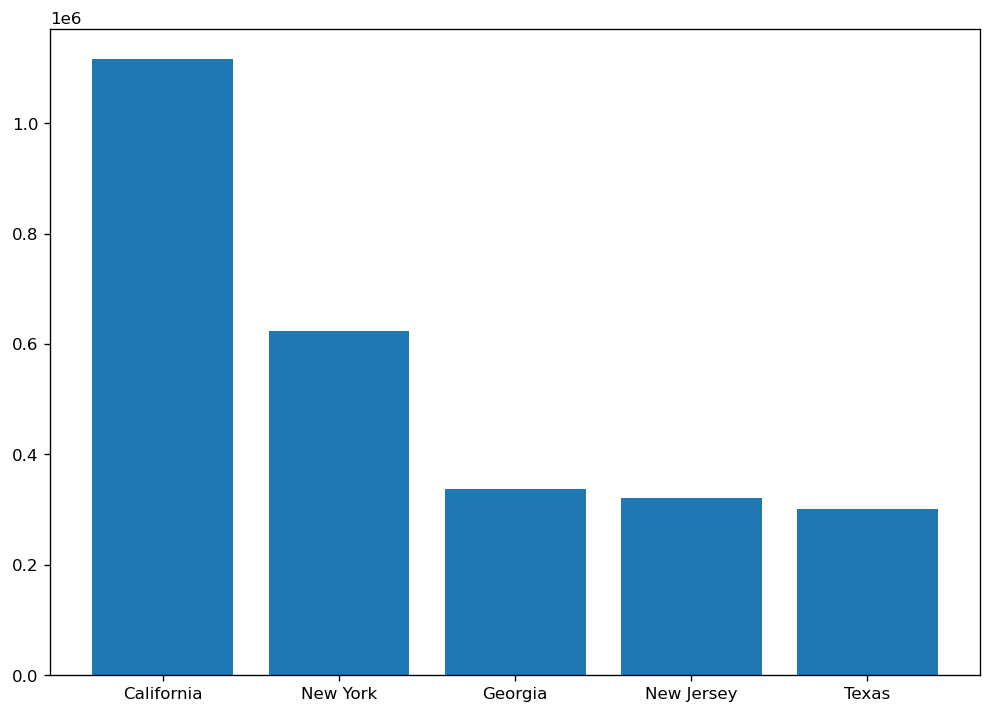

In [137]:
def top5States(df,year):
    #storing df in yearly data
    yearly_data = df 
    if(year!=""):
        #11/05/2017 contain '2017', it gets stored in yearly data
        yearly_data = df[df['WARN Received Date'].str.contains(str(year))==True]
    #Grouping by states and adding total no.of workers in each state 
    group_by_state = yearly_data.groupby('State',sort=True)['Number of Workers'].sum().reset_index() 
    # Arranging in descending order to see the highest no.of layoff
    group_by_state = group_by_state.sort_values(by='Number of Workers',ascending=False) 
    #Fetching top 5 states
    top5states = group_by_state.head() 
    print(top5states)
    # plotting the top 5 states
    fig = plt.figure(figsize =(10, 7))
    # x ->state , y ->no.of workers
    plt.bar(top5states['State'],top5states['Number of Workers'])
    # Show Plot
    plt.show()
    
# calling the function , Here year is optional
top5States(df,'') 

In [138]:
def top5States_v1(df,year):
    #storing df in yearly data
    yearly_data = df 
    if(year!=""):
        #11/05/2017 contain '2017', it gets stored in yearly data
        yearly_data = df[df['WARN Received Date'].str.contains(str(year))==True] 
    #Grouping by states and adding total no.of workers in each state
    group_by_state = yearly_data.groupby('State',sort=True)['Number of Workers'].sum().reset_index()  
    # Arranging in descending order to see the highest no.of layoff
    group_by_state = group_by_state.sort_values(by='Number of Workers',ascending=False) 
    group_by_state['State_code'] = ''
    us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    }
    #State name, no of workers, state code
    print(group_by_state) 
    for index,rows in group_by_state.iterrows(): 
        #Washington DC is a city so it's not present in dataset, so manually merging it with virginia
        if(rows['State']=='Washington, D.C.'): 
            rows['State_code'] = 'VA'
        else:
            # state - key returns corresponding state code using dictionary
            rows['State_code'] = us_state_to_abbrev[rows['State']] 
    fig = px.choropleth(group_by_state,
                    locations='State_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color_continuous_scale='magma',
                    color='Number of Workers'
                    )
    fig.show()
# calling the function , Here year is optional
top5States_v1(df,2017) 

               State Number of Workers State_code
3         California             55534           
7            Florida             27930           
22          New York             22902           
28             Texas             21726           
9            Indiana             10457           
20        New Jersey              8311           
15          Michigan              6923           
35         Wisconsin              6766           
31          Virginia              6180           
32        Washington              5203           
25            Oregon              4697           
16          Missouri              4131           
10              Iowa              2975           
4           Colorado              2971           
19            Nevada              2673           
14          Maryland              2555           
12          Kentucky              2480           
11            Kansas              2306           
18          Nebraska              2279           


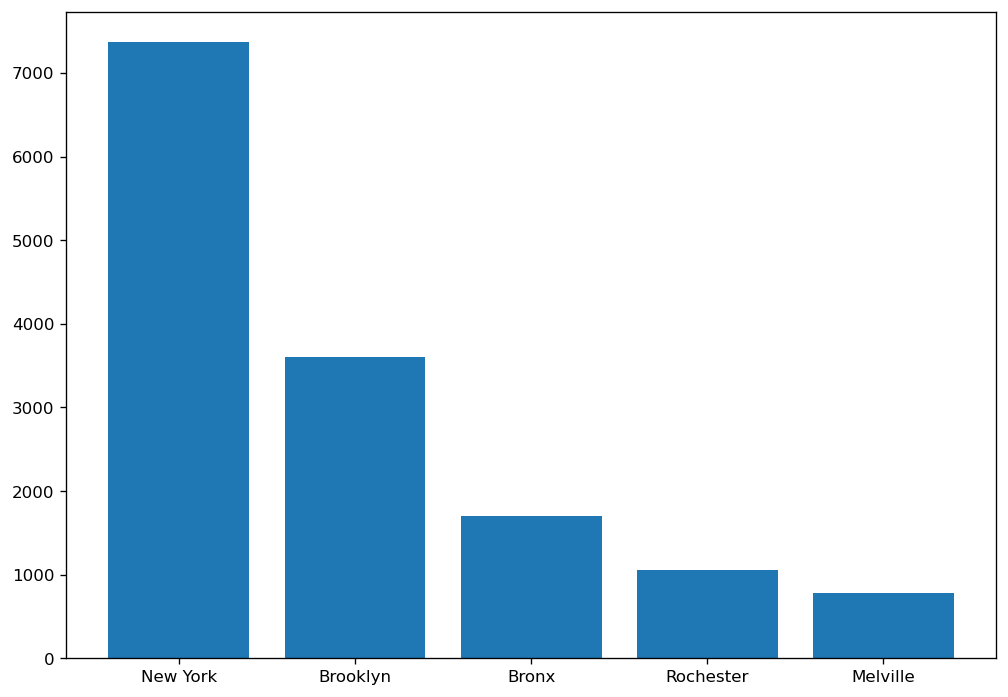

In [139]:
def top5Cities(df,year,state): 
    #Filtering NA values in cities and storing it in filtered_df
    filtered_df = df[df['City'].isna()==False] 
    #If the state value matches with state we're passing, it gets stored in state_data
    state_data =filtered_df[filtered_df['State']==state] 
    if(year==""):
        #If year is empty, data for all the years are stored
        year_state_data = state_data 
    else:
        #If the year ,matches with the year we're providing, data for that particular year gets stored
        year_state_data = state_data[state_data['WARN Received Date'].str.contains(str(year))==True] 
    #Grouping by cities for that particular state
    group_by_city = year_state_data.groupby('City',sort=True)['Number of Workers'].sum().reset_index() 
    group_by_city = group_by_city.sort_values(by='Number of Workers',ascending=False) 
    top5cities = group_by_city.head()
    fig = plt.figure(figsize =(10, 7))
    plt.bar(top5cities['City'],top5cities['Number of Workers'])
    # Show Plot
    plt.show()
# Here year is optional, state is mandatory
top5Cities(df,2018,'New York')

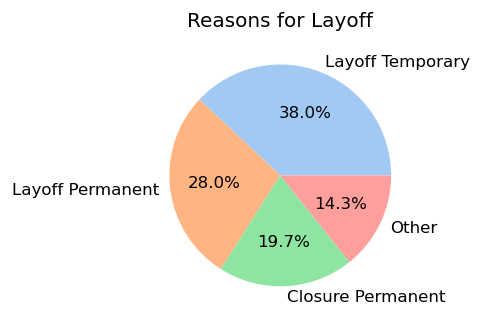

In [140]:
def reasons_plot(df,year,state):
    # If not null, then remaining data stores in filtered_df
    filtered_df = df[df['Closure/Layoff'].isna()==False]
    if(year!=''): 
        year_data = filtered_df[filtered_df['WARN Received Date'].str.contains(str(year))==True] 
    else:
        year_data = filtered_df 
    if(state!=''):
        year_state_data =year_data[year_data['State']==state] 
    else:
        year_state_data = year_data
    group_by_reason = year_state_data.groupby('Closure/Layoff',sort=True)['Number of Workers'].sum().reset_index()
    group_by_reason = group_by_reason.sort_values(by='Number of Workers',ascending=False)
    if(len(group_by_reason)==0):
        print("No Data Present")
    else:
        #Top 3  [78327,76638,21331,900]
        values = list(group_by_reason['Number of Workers'][0:3])
        values.append(sum(group_by_reason['Number of Workers'][3:])) 
        labels = list(group_by_reason['Closure/Layoff'][0:3])
        labels.append('Other')
        colors = sns.color_palette('pastel')[0:4]

        #create pie chart
        plt.pie(values, labels = labels, colors = colors,autopct='%.1f%%')
        plt.title('Reasons for Layoff')
        plt.show()

reasons_plot(df,'','California')

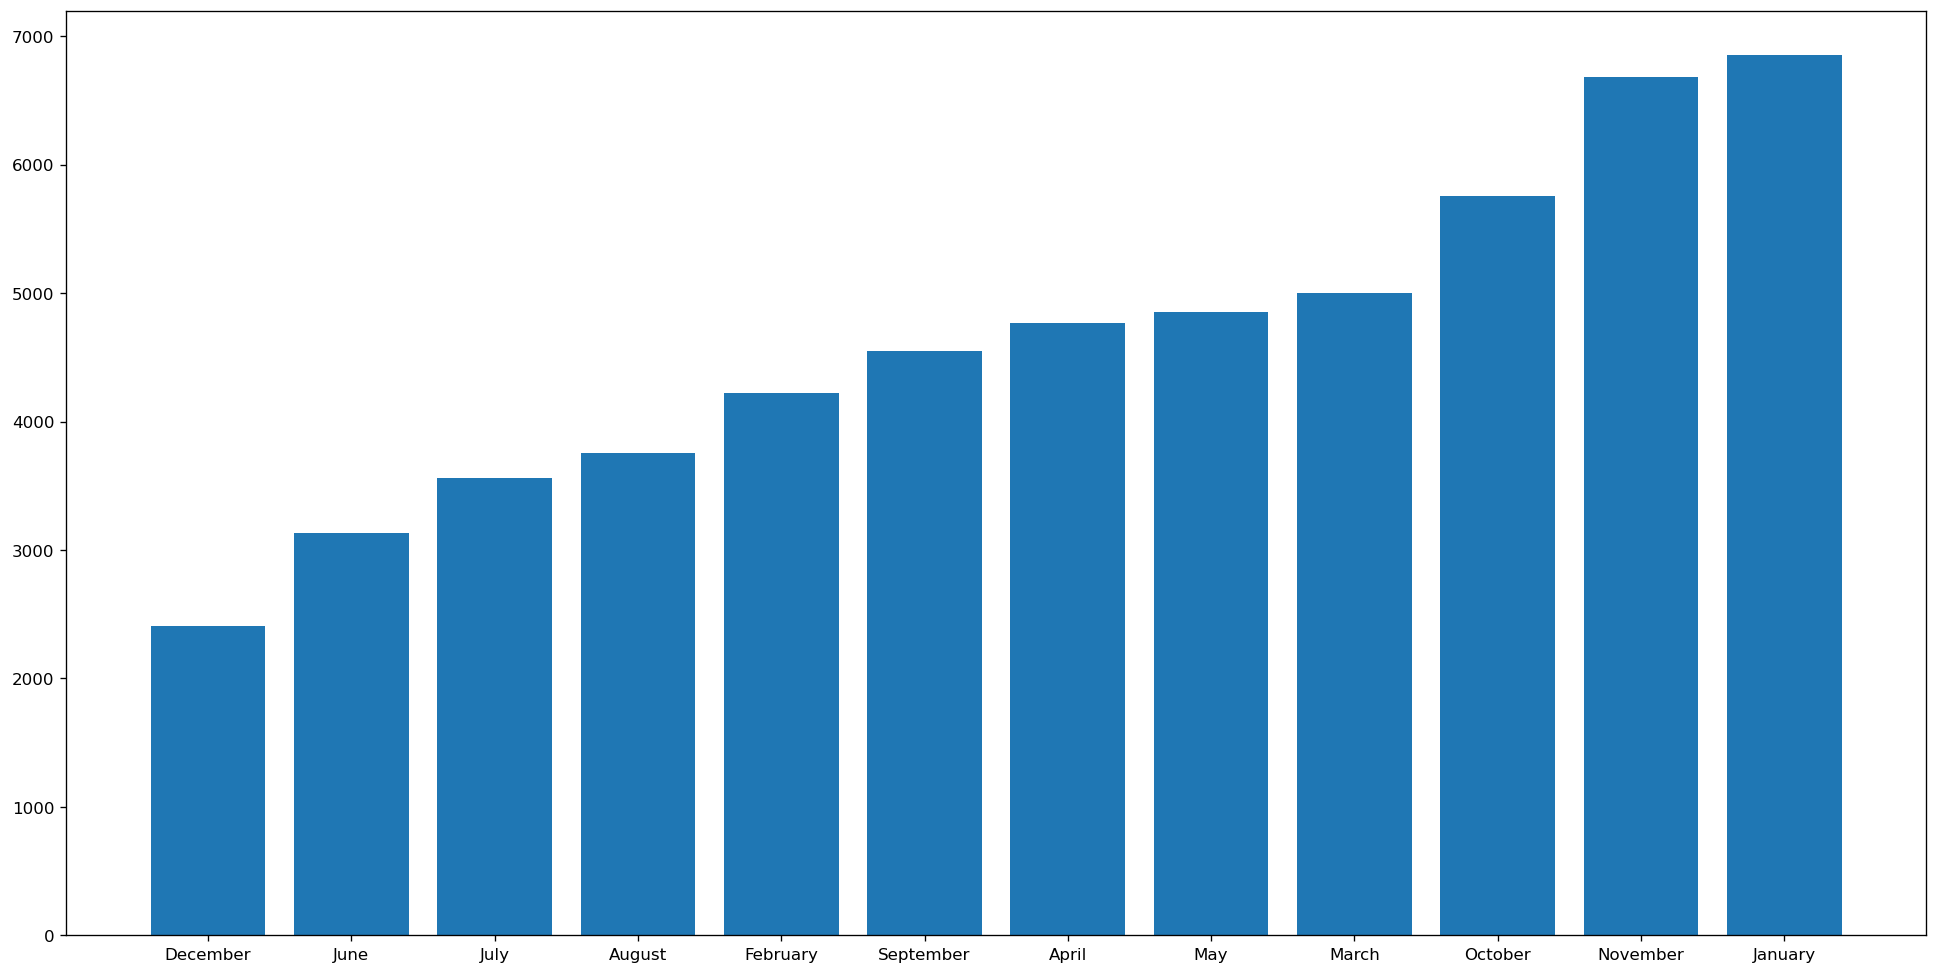

In [141]:
def month_wise_analysis(df,state,year):
    #removing null values in Warn received date
    new_df = df[df['WARN Received Date'].isna()==False] 
    #Creating a new column month with empty rows
    new_df.insert(7,'Month','') 
    for index,rows in new_df.iterrows():
        #splitting the date using '/', eg: 7/11/2022 -> ['7','11','2022']
        dates = rows['WARN Received Date'].split('/') 
        month = dates[0]
        if(month=='1'):
            rows['Month']= 'January'
        elif(month=='2'):
            rows['Month']= 'February'
        elif(month=='3'):
            rows['Month'] = 'March'
        elif(month=='4'):
            rows['Month'] = 'April'
        elif(month=='5'):
            rows['Month'] = 'May'
        elif(month=='6'):
            rows['Month']= 'June'
        elif(month=='7'):
            rows['Month'] = 'July'
        elif(month=='8'):
            rows['Month'] = 'August'
        elif(month=='9'):
            rows['Month'] = 'September'
        elif(month=='10'):
            rows['Month']= 'October'
        elif(month=='11'):
            rows['Month'] = 'November'
        else:
            rows['Month'] = 'December' 
    if(year!=''): 
        year_data = new_df[new_df['WARN Received Date'].str.contains(str(year))==True] 
    else:
        year_data = new_df 
    
    year_state_data =year_data[year_data['State']==state] 
    group_by_month = year_state_data.groupby('Month',sort=True)['Number of Workers'].sum().reset_index()
    group_by_month = group_by_month.sort_values(by='Number of Workers',ascending=True)
    # plotting the top 5 states
    fig = plt.figure(figsize =(20, 10)) 
    # x ->state , y ->no.of workers
    plt.bar(group_by_month['Month'],group_by_month['Number of Workers']) 
    # Show Plot
    plt.show()
    
#State is mandatory , year is optional 
month_wise_analysis(df,'California',2017)      
    
    

# DATA MODELLING

In [91]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import numpy as np
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [92]:
#Reading the csv
df = pd.read_csv("Warn Database 1-22-2023 - Sheet1.csv")
df = df.drop(columns=['Temporary/Permanent', 'Union','Region','County','Industry','Notes'])
df.head()

State                                     Company        City  \
0  Alabama                       Primus Solutions, LLC   Daleville   
1  Alabama                  Corsicana Mattress Company      Jasper   
2  Alabama           Portfolio Recovery Associates LLC  Birmingham   
3  Alabama  Crothall Healthcare Environmental Services     Gadsden   
4  Alabama                 National Packaging Co. Inc.     Decatur   

  Number of Workers WARN Received Date Effective Date Closure/Layoff  
0               132          7/28/2021      9/16/2021         Layoff  
1                42          7/26/2021      9/20/2021        Closure  
2               133          7/20/2021      9/30/2021        Closure  
3                58           7/7/2021      8/21/2021         Layoff  
4                62          6/30/2021       8/7/2021         Layoff

# Selecting the state - New York

In [93]:
#Selecting the state
rslt_ala = df[df['State'] == 'New York']
len(rslt_ala)
rslt_ala.head()

State                                            Company  \
24459  New York                                     Sovereign Bank   
24460  New York                                     Sovereign Bank   
24461  New York                                     Sovereign Bank   
24462  New York     Home Market Foods, Inc. Freezer Queen division   
24463  New York  Neil Lincoln-Mercury/Hyundai Corp. d/b/a Neil ...   

                City Number of Workers WARN Received Date Effective Date  \
24459       Brooklyn                99           7/6/2006       6/1/2006   
24460       Brooklyn               134           7/6/2006       6/1/2006   
24461  Staten Island                78           7/6/2006       6/1/2006   
24462        Buffalo               170          7/20/2006       7/6/2006   
24463        Medford                23          7/24/2006      9/25/2006   

      Closure/Layoff  
24459   Plant Layoff  
24460   Plant Layoff  
24461   Plant Layoff  
24462  Plant Closing  
24463   Plant Layoff

In [94]:
# Formatting the WARN Received Date
date_formatted = []
count = 0
dummy = []
year = ''

for ele in rslt_ala['WARN Received Date']:
    count = count+1
    ele = str(ele)
    yy = ele.split('/')[2]
    month =''
    date =''
    yy=''
    if(len(ele.split('/')[0]) == 1):
        month = '0'+ ele.split('/')[0]
    if(len(ele.split('/')[1]) == 1):
        date = '0'+ ele.split('/')[1]
    if(len(ele.split('/')[2]) == 2):
        if(int(ele.split('/')[2]) > 60 and int(ele.split('/')[2]) <100):
            yy = '19'+ele.split('/')[2]
        else:
            yy = '20' + ele.split('/')[2]
    
    if(month==''):
        month = ele.split('/')[0]
    if(date==''):
        date = ele.split('/')[1]
    if(yy==''):
        yy = ele.split('/')[2]
    date_formatted.append(str(yy) + '-' + month + '-' + date)
rslt_ala['WARN Received Date'] = date_formatted

/var/folders/sq/jc3ywbjn10q7b4br_zhy8nrc0000gn/T/ipykernel_7995/3415229184.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_ala['WARN Received Date'] = date_formatted


In [95]:
# Sorting the dataframe by WARN Received Date
rslt_ala = rslt_ala.sort_values(by=['WARN Received Date'])
rslt_ala.head(80)

State                                            Company  \
24459  New York                                     Sovereign Bank   
24460  New York                                     Sovereign Bank   
24461  New York                                     Sovereign Bank   
24462  New York     Home Market Foods, Inc. Freezer Queen division   
24463  New York  Neil Lincoln-Mercury/Hyundai Corp. d/b/a Neil ...   
...         ...                                                ...   
24534  New York                             Sears, Roebuck and Co.   
24535  New York                   Uniflex Holdings, Inc. (Uniflex)   
24536  New York                   Uniflex Holdings, Inc. (Uniflex)   
24537  New York     Camp LaGuardia Shelter (Volunteers of America)   
24538  New York  Citizens Telecommunications Company of New Yor...   

                City Number of Workers WARN Received Date Effective Date  \
24459       Brooklyn                99         2006-07-06       6/1/2006   
24460       Brooklyn               134         2006-07-06       6/1/2006   
24461  Staten Island                78         2006-07-06       6/1/2006   
24462        Buffalo               170         2006-07-20       7/6/2006   
24463        Medford                23         2006-07-24      9/25/2006   
...              ...               ...                ...            ...   
24534          Bronx               217         2006-12-18      2/15/2007   
24535     Hicksville                11         2006-12-19      2/12/2007   
24536       Westbury               135         2006-12-19      2/12/2007   
24537        Chester               170         2006-12-29       2/1/2007   
24538   Gloversville               204         2007-01-02       3/1/2007   

      Closure/Layoff  
24459   Plant Layoff  
24460   Plant Layoff  
24461   Plant Layoff  
24462  Plant Closing  
24463   Plant Layoff  
...              ...  
24534  Plant Closing  
24535  Plant Closing  
24536  Plant Closing  
24537  Plant Closing  
24538  Plant Closing  

[80 rows x 7 columns]

In [96]:
#Creating new data frame(new_df) with columns Year, Number of Workers, back_up_year and updating the existing df with new_df
number_of_workers = rslt_ala['Number of Workers']
print(len(number_of_workers))
warn_received_date = rslt_ala['WARN Received Date']
warn_received_date.tail(10)

workers = rslt_ala['Number of Workers']
type(list(workers))
workers = list(workers)

warn_rcd_date = rslt_ala['WARN Received Date']
type(list(warn_rcd_date))
warn_rcd_date = list(warn_rcd_date)


year = []
back_year = []
for i in range(0,len(warn_rcd_date)):
    year_check = str(warn_rcd_date[i]).split('-')[0] 
    month_check = str(warn_rcd_date[i]).split('-')[1]
    year.append(str(year_check+'-'+month_check))
    back_year.append(str(year_check+month_check))

set_year = set(year)
set_year = sorted(set_year)

set_back_year = set(back_year)
set_back_year = sorted(back_year)

dictionary_year = dict.fromkeys(set_year, 0)
dictionary_year

total = 0
c = 1

for i in range(0,len(warn_rcd_date)):
    key_year = str(warn_rcd_date[i]).split('-')[0]
    key_month = str(warn_rcd_date[i]).split('-')[1]
    key_data = str(key_year) +'-'+ str(key_month)
    if key_data in dictionary_year.keys():
        try:
            total = int(workers[i]) + int(dictionary_year[key_data])
        except:
            total = int(dictionary_year[key_data])+0
        dictionary_year.update({key_data:total}) 
        total = 0
        c = c+1
df = pd.DataFrame(dictionary_year.items())
df.columns = ['Year','Number of Workers']
df["back_up_year"] = df["Year"]
df['back_up_year'] = df['back_up_year'].map(lambda x: str(x.split('-')[0])+str(x.split('-')[1]))
new_df = pd.DataFrame(None)
no_workers_list = []
year_list=[]
for i in range(0,len(df["Year"])):
    if df['Year'][i].split('-')[0] <= "2020":
        year_list.append(df['Year'][i])
        no_workers_list.append(df['Number of Workers'][i])
new_df['Year'] = year_list
new_df['Number of Workers'] = no_workers_list
new_df["back_up_year"] = new_df["Year"]
new_df['back_up_year'] = new_df['back_up_year'].map(lambda x: str(x.split('-')[0])+str(x.split('-')[1]))
df = new_df
df

7063


Year  Number of Workers back_up_year
0    2006-07                875       200607
1    2006-08               1087       200608
2    2006-09               1225       200609
3    2006-10                919       200610
4    2006-11                782       200611
..       ...                ...          ...
165  2020-04              48401       202004
166  2020-05              14022       202005
167  2020-06              37049       202006
168  2020-07              24699       202007
169  2020-08               7054       202008

[170 rows x 3 columns]

In [97]:
#Setting the figure size and extracting the columns for plotting in graph
plt.figure(figsize=(5000,1000))
yy = list(df['Year'])
ww = list(df['Number of Workers'])

<Figure size 600000x120000 with 0 Axes>

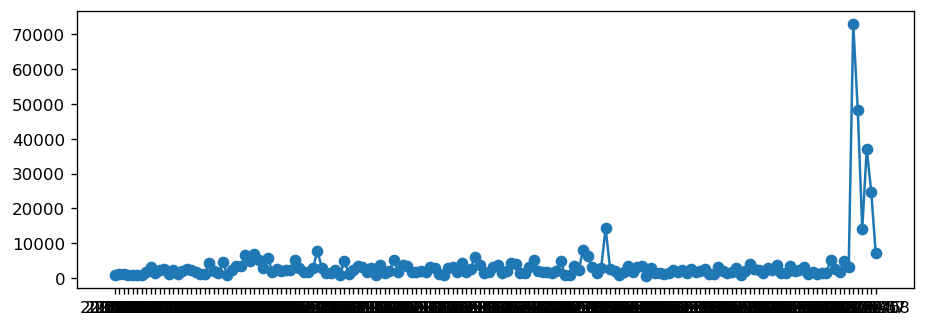

In [98]:
#Plotting the graph
a = plt.plot(yy,ww,marker="o")
plt.savefig('New York.png')

# LINEAR REGRESSION

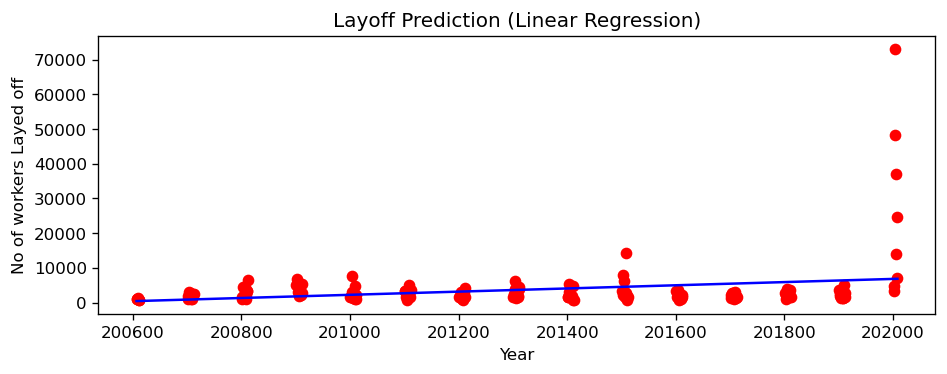

Variance score: 0.055672412845621744
18645519.470588237 MSE
4318.045793016586 RMSE
2806.176470588235 Absoulte Error


In [99]:
df['back_up_year'] = pd.to_numeric(df['back_up_year'])

X = df.iloc[:, 2:3].values
y = df.iloc[:, 1:2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Layoff Prediction (Linear Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    return
viz_linear()
y_pred = lin_reg.predict(X_test).round()

print('Variance score: {}'.format(lin_reg.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print(mse,'MSE')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'Absoulte Error')

# Polymonial Regression

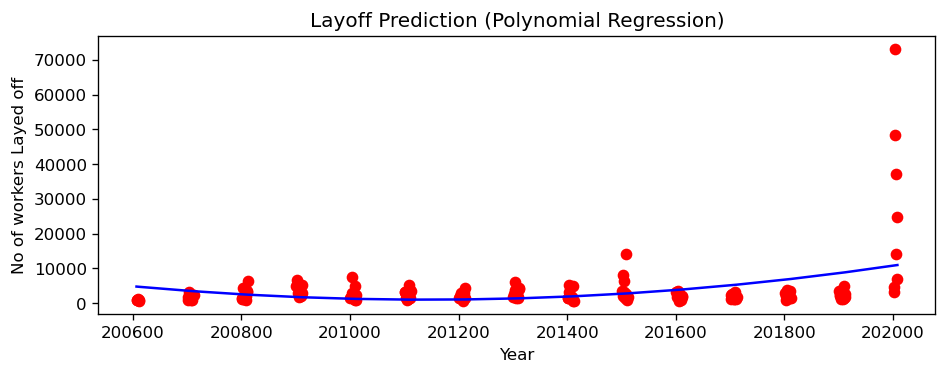

18714887.79411765
4326.070710716325
2877.8529411764707


In [100]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Layoff Prediction (Polynomial Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    
    return
viz_polymonial()
# Predicting a new result with Polynomial Regression
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test)).round()
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error)

# Logistic Regression

/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


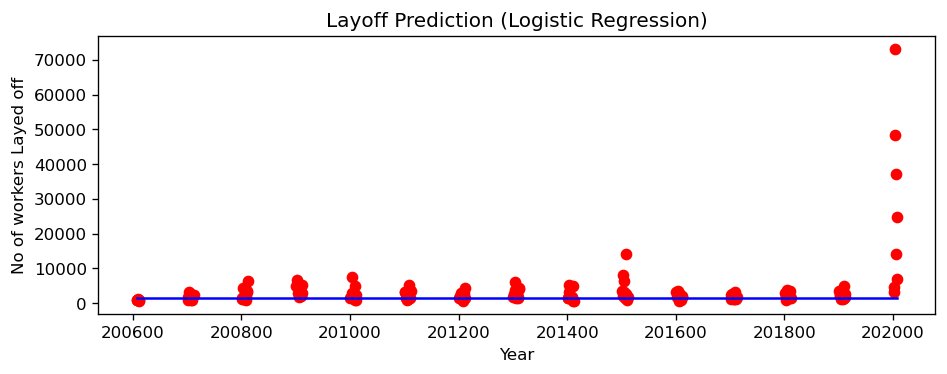

mean_squared_error -  22998538.20588235
RMSE -  4795.679118319151
mean_absolute_error -  1926.0294117647059


In [101]:
logr = LogisticRegression()
logr.fit(X,y)
def viz_logistic():
    plt.scatter(X, y, color='red')
    plt.plot(X, logr.predict(X), color='blue')
    plt.title('Layoff Prediction (Logistic Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    return
viz_logistic()

y_pred = logr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error - ",mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE - ",rmse)
abs_error = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error - ",abs_error)

# Decision Tree

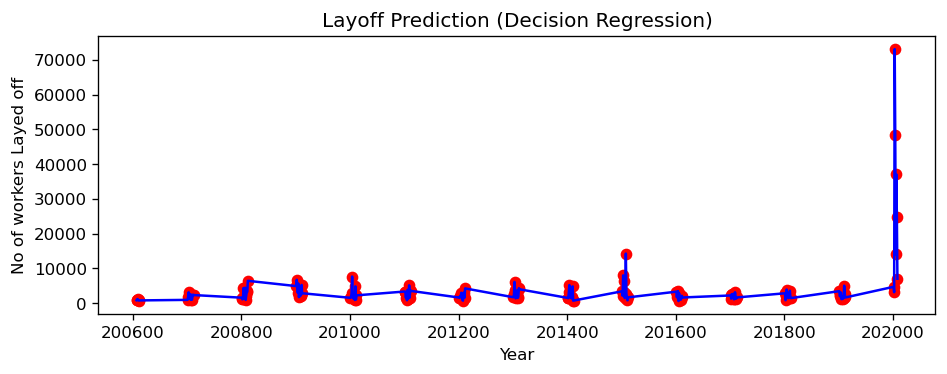

MSE -  0.0
RMSE -  0.0
mean_absolute_error -  0.0


In [102]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X,y)

def viz_Decision():
    plt.scatter(X, y, color='red')
    plt.plot(X, regressor.predict(X), color='blue')
    plt.title('Layoff Prediction (Decision Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    return
viz_Decision()
y_pred = regressor.predict(X_test).round()
mse = mean_squared_error(y_test, y_pred)
print("MSE - ",mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE - ",rmse)
abs_error = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error - ",abs_error)

# Lassso Regression


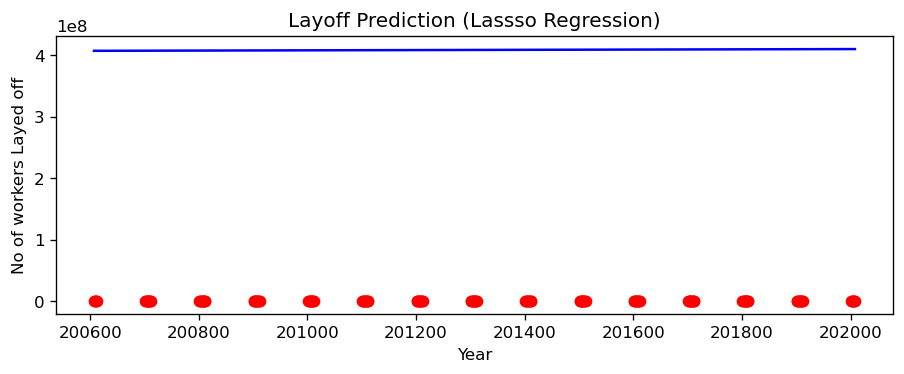

Model Score:  0.04242548760496223
Lasso Coefficient -  [2028.14818969]
mean_squared_error -  18906868.11764706
RMSE -  4348.202860682452
mean_absolute_error -  2910.1176470588234


In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test).round()

def viz_lasso():
    plt.scatter(X, y, color='red')
    plt.plot(X, lasso.predict(X), color='blue')
    plt.title('Layoff Prediction (Lassso Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    return
viz_lasso()
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
print("Lasso Coefficient - ",lasso.coef_)
mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error - ',mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE - ",rmse)
abs_error = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error - ",abs_error)

-2791447311.337408


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


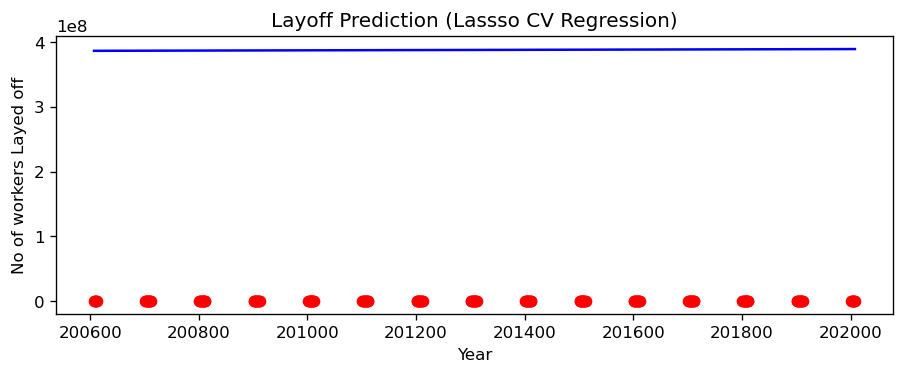

mean_squared_error -  18906868.11764706
RMSE -  4348.202860682452
mean_absolute_error -  2910.1176470588234


In [104]:
# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5)
# Fit the Lasso model
lasso_cv.fit(X_train, y_train)
# Create the model score
print(lasso_cv.score(X, y))
def viz_lasso_cv():
    plt.scatter(X, y, color='red')
    plt.plot(X, lasso_cv.predict(X), color='blue')
    plt.title('Layoff Prediction (Lassso CV Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    return
viz_lasso_cv()
mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error - ",mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE - ",rmse)
abs_error = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error - ",abs_error)

# Ridge Regression


MSE train: 58293874.152, test: 18886354.412
R^2 train: 0.066, test: 0.043


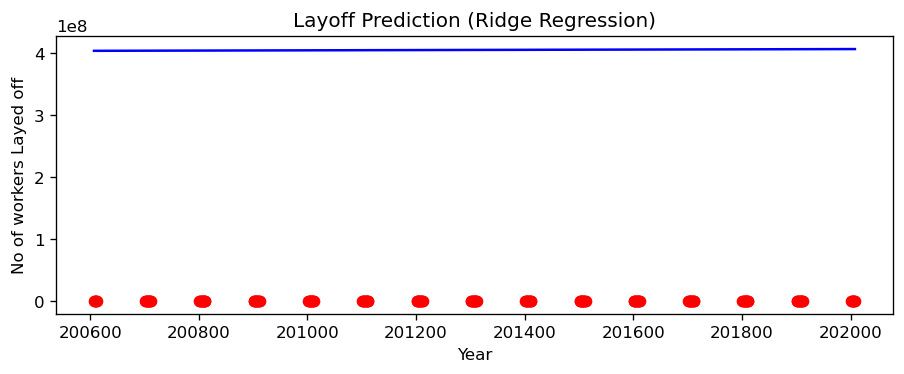

mean_squared_error -  18906868.11764706
rmse -  4348.202860682452
mean_absolute_error -  2910.1176470588234


In [105]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)
# Calculate the predicted value for training and test dataset
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test).round()
# Mean Squared Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
# R-Squared
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
def viz_ridge():
    plt.scatter(X, y, color='red')
    plt.plot(X, pipeline.predict(X), color='blue')
    plt.title('Layoff Prediction (Ridge Regression)')
    plt.xlabel('Year')
    plt.ylabel('No of workers Layed off')
    plt.show()
    return
viz_ridge()
mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error - ",mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('rmse - ',rmse)
abs_error = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error - ",abs_error)

In [106]:
df.isnull().sum()

Year                 0
Number of Workers    0
back_up_year         0
dtype: int64

# ARIMA

In [107]:
print(df)

        Year  Number of Workers  back_up_year
0    2006-07                875        200607
1    2006-08               1087        200608
2    2006-09               1225        200609
3    2006-10                919        200610
4    2006-11                782        200611
..       ...                ...           ...
165  2020-04              48401        202004
166  2020-05              14022        202005
167  2020-06              37049        202006
168  2020-07              24699        202007
169  2020-08               7054        202008

[170 rows x 3 columns]


# 1st Order Differencing

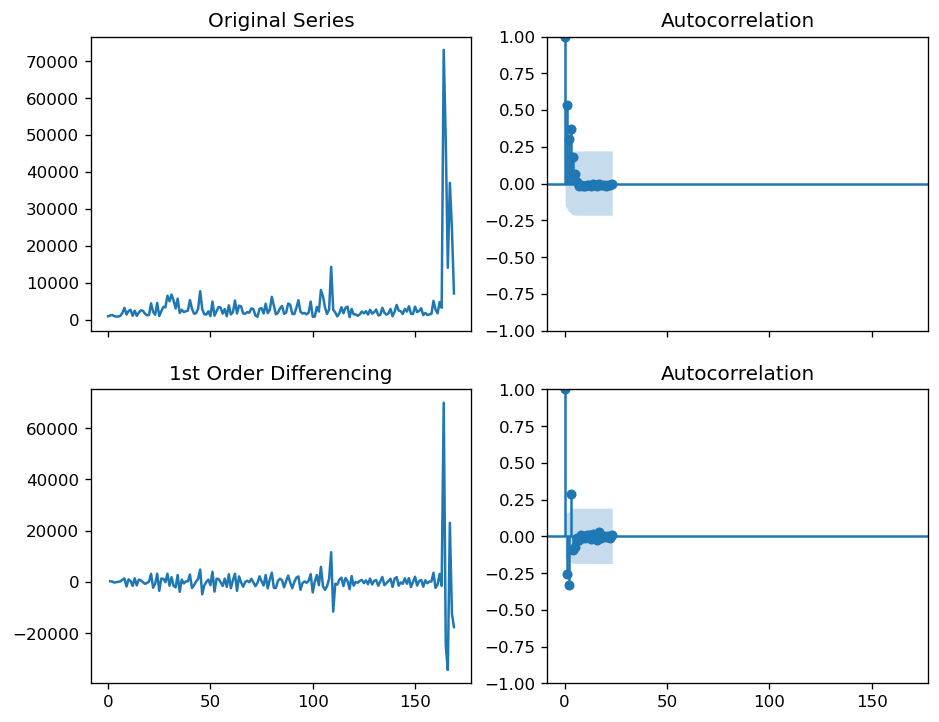

In [108]:
# fixing the size
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df['Number of Workers']); axes[0, 0].set_title('Original Series')
plot_acf(df['Number of Workers'], ax=axes[0, 1])
# 1st Differencing to make stationary time series data
axes[1, 0].plot(df['Number of Workers'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Number of Workers'].diff().dropna(), ax=axes[1, 1])
plt.show()
plt.show()

# Partial Auto correlation

0          NaN
1        212.0
2        138.0
3       -306.0
4       -137.0
        ...   
165   -24670.0
166   -34379.0
167    23027.0
168   -12350.0
169   -17645.0
Name: Number of Workers, Length: 170, dtype: float64


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


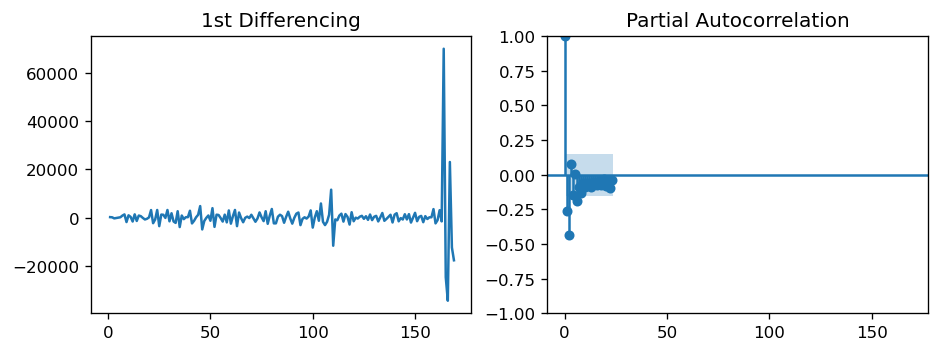

In [109]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# fixing the axis
fig, axes = plt.subplots(1, 2, sharex=True)
# plotting on differen axis
axes[0].plot(df['Number of Workers'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
# plotting partial autocorrelation function
print(df['Number of Workers'].diff())
plot_pacf(df['Number of Workers'].diff().dropna(), ax=axes[1])
plt.show()

# Auto correlation

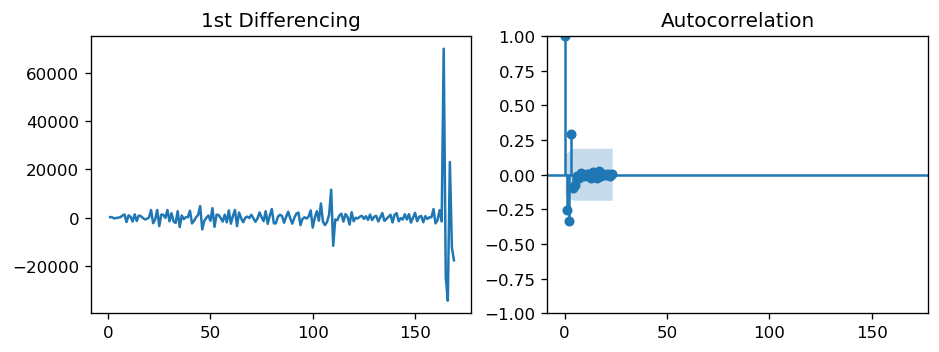

In [110]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
#  fixing the subplots
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Number of Workers'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
# plotting the autocorrelation function
plot_acf(df['Number of Workers'].diff().dropna(), ax=axes[1])
plt.show()

# Training arima modeling 

In [111]:
# Determining the order from above three steps and passing into ARIMA model and training it
model = ARIMA(df['Number of Workers'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Number of Workers   No. Observations:                  170
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1725.107
Date:                Sun, 30 Jul 2023   AIC                           3458.214
Time:                        15:19:59   BIC                           3470.758
Sample:                             0   HQIC                          3463.304
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3664.5706   1379.227      2.657      0.008     961.336    6367.806
ar.L1          0.7249      0.042     17.098      0.000       0.642       0.808
ma.L1         -0.2801      0.058     -4.823      0.0

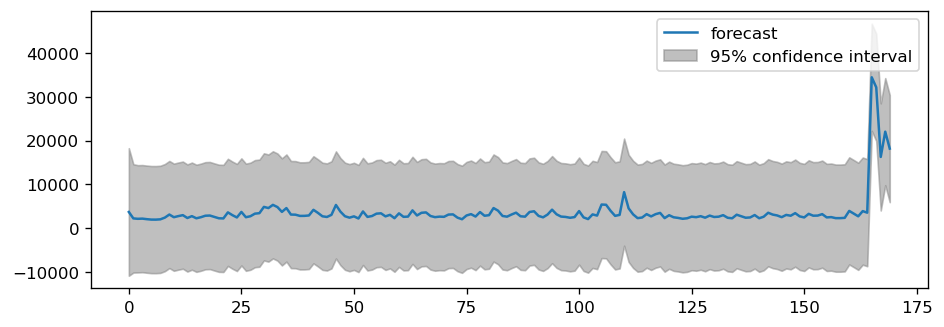

In [112]:
#Predicting the result
plot_predict(model_fit,dynamic=False)
plt.show()

In [113]:
# Splitting the train test data for Auto arima model
print(len(df['Number of Workers']))
x_lim = int(round(len(df['Number of Workers'])*0.8))
print(x_lim)
train = df['Number of Workers'][:x_lim]
test = df['Number of Workers'][x_lim:]
print(train)

170
136
0       875
1      1087
2      1225
3       919
4       782
       ... 
131    2710
132    1140
133    1246
134    3171
135    1862
Name: Number of Workers, Length: 136, dtype: int64


# Auto arima model

In [114]:
#Auto arima which automatically determines the order
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
print(auto_arima)
print(auto_arima.summary())

 ARIMA(5,0,0)(0,0,0)[0]          
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1209.714
Date:                Sun, 30 Jul 2023   AIC                           2431.427
Time:                        15:20:00   BIC                           2448.903
Sample:                             0   HQIC                          2438.529
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2296      0.063      3.638      0.000       0.106       0.353
ar.L2          0.0441      0.091      0.482      0.630      -0.135       0.223
ar.L3          0.1

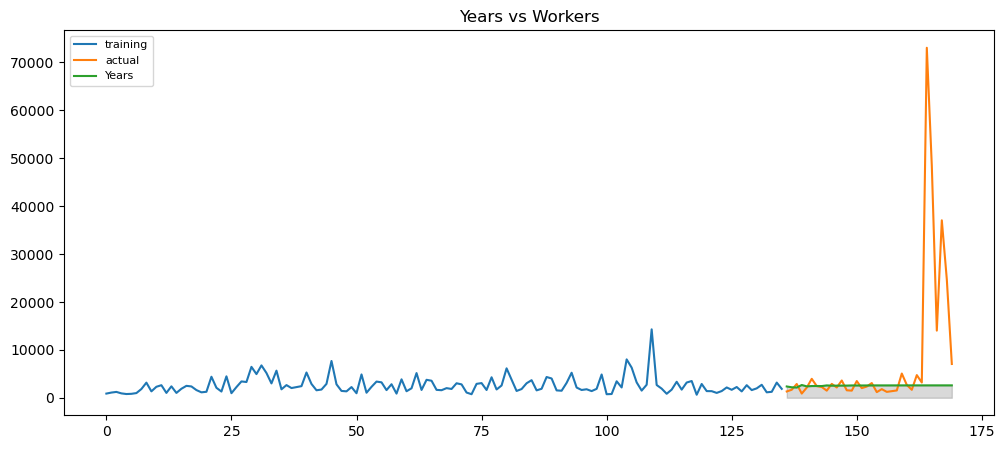

In [115]:
model = ARIMA(train, order=(5, 0, 0))  
fitted = model.fit()  
# Forecast using 95% confidence interval
workers = fitted.forecast(39, alpha=0.05)
# Make as pandas series
worker_series = pd.Series(workers, index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(worker_series, label='Years')
plt.fill_between(worker_series.index, worker_series, color='k', alpha=.15)
plt.title('Years vs Workers')
plt.legend(loc='upper left', fontsize=8)
plt.show()

34
170    9235.103931
171    7702.772811
172    6591.952258
173    5786.693992
174    5202.944551
175    4779.771735
176    4473.004446
177    4250.622088
178    4089.412222
179    3972.547642
180    3887.829935
181    3826.416206
182    3781.896042
183    3749.622395
184    3726.226518
185    3709.266332
186    3696.971519
187    3688.058740
188    3681.597669
189    3676.913897
190    3673.518528
191    3671.057150
192    3669.272842
193    3667.979359
194    3667.041684
195    3666.361943
196    3665.869184
197    3665.511972
198    3665.253021
199    3665.065302
200    3664.929220
201    3664.830572
202    3664.759059
203    3664.707218
Name: predicted_mean, dtype: float64


<AxesSubplot:>

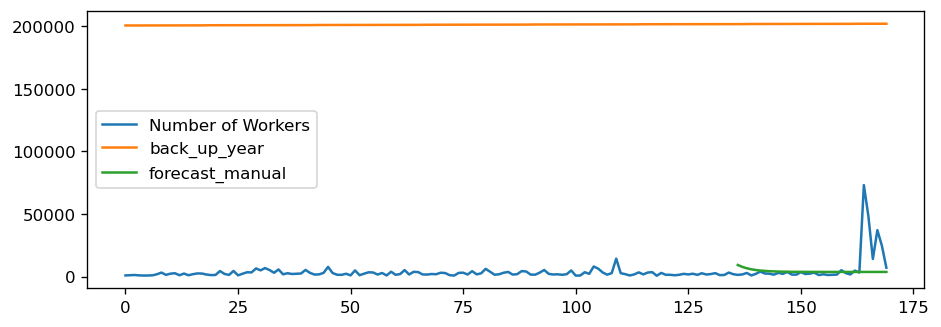

In [116]:
print((len(test)))
forecast_test = model_fit.forecast(len(test))
print(forecast_test)
df['forecast_manual'] = [None]*len(train) + list(forecast_test)

df.plot()

<AxesSubplot:>

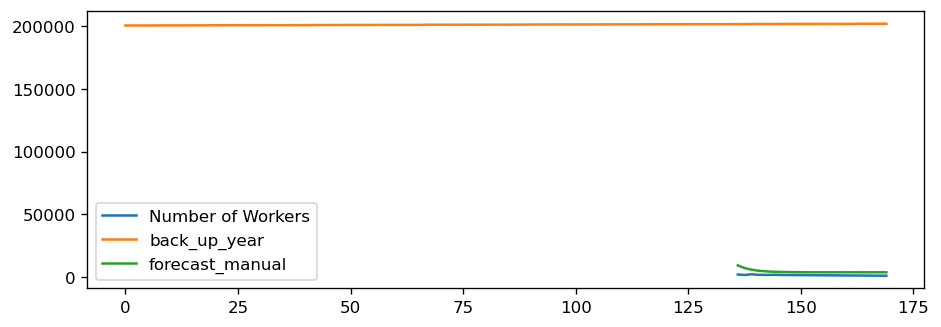

In [117]:
#Forecasting the result (Predicting the result) using Auto arima
forecast_test_auto = auto_arima.predict(n_periods=len(test))
df['Number of Workers'] = [None]*len(train) + list(forecast_test_auto)
df.plot()

In [118]:
# Getting the error values
mae = mean_absolute_error(test, forecast_test)
mape = mean_absolute_percentage_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')


mae - manual: 7176.146944461673
mape - manual: 1.256304133579686
rmse - manual: 16004.886401836939


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 9235.103931311936, 7702.772811451679, 6591.952258191146, 5786.693991519276, 5202.944551395893, 4779.771734738277, 4473.00444649884, 4250.6220877333, 4089.4122215381612, 3972.547641528

/var/folders/sq/jc3ywbjn10q7b4br_zhy8nrc0000gn/T/ipykernel_7995/3506085537.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test.append(ser)


<AxesSubplot:>

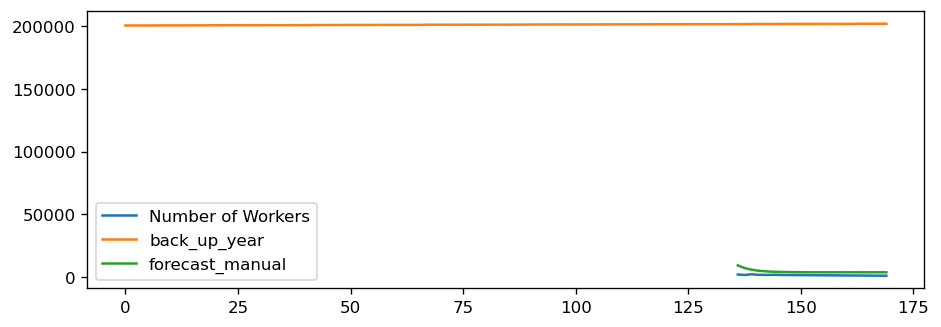

In [119]:
#Prediting for next 3 years
d = {'2023': 0, '2024': 0, '2025': 0}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
test.append(ser)
forecast_test = model_fit.forecast(len(test))
print([None]*len(train)+list(forecast_test))
df['forecast_manual'] = [None]*len(train) + list(forecast_test)
df.plot()

### AUTOMATED ARIMA - RUN FROM HERE - For all states

In [120]:
### AUTOMATED ARIMA - RUN FROM HERE

In [121]:
df = pd.read_csv("Warn Database 1-22-2023 - Sheet1.csv")
df = df.drop(columns=['Temporary/Permanent', 'Union','Region','County','Industry','Notes'])

In [122]:
df['State'].unique()[2]

'Arizona'

In [123]:
copy_df = df

In [124]:
def allstates(df,statename):
    rslt_ala = df[df['State'] == statename]
    date_formatted = []
    count = 0
    dummy = []
    year = ''
    rslt_ala = rslt_ala[rslt_ala['WARN Received Date'].isna() == False]
    print(statename)
    for ele in rslt_ala['WARN Received Date']:
        count = count+1
        ele = str(ele)
        yy = ele.split('/')[2]
        month =''
        date =''
        yy=''
        if(ele=='nan'):
            continue
        if(len(ele.split('/')[0]) == 1):
            month = '0'+ ele.split('/')[0]
        if(len(ele.split('/')[1]) == 1):
            date = '0'+ ele.split('/')[1]
        if(len(ele.split('/')[2]) == 2):
            if(int(ele.split('/')[2]) > 60 and int(ele.split('/')[2]) <100):
                yy = '19'+ele.split('/')[2]
            else:
                yy = '20' + ele.split('/')[2]

        if(month==''):
            month = ele.split('/')[0]
        if(date==''):
            date = ele.split('/')[1]
        if(yy==''):
            try:
                yy = ele.split('/')[2]
            except:
                print(ele)
        date_formatted.append(str(yy) + '-' + month + '-' + date)
    rslt_ala['WARN Received Date'] = date_formatted
    rslt_ala = rslt_ala.sort_values(by=['WARN Received Date'])
    
    
    number_of_workers = rslt_ala['Number of Workers']
    warn_received_date = rslt_ala['WARN Received Date']
    warn_received_date.tail(10)

    workers = rslt_ala['Number of Workers']
    workers = list(workers)

    warn_rcd_date = rslt_ala['WARN Received Date']
    warn_rcd_date = list(warn_rcd_date)


    year = []
    back_year = []
    for i in range(0,len(warn_rcd_date)):
        year_check = str(warn_rcd_date[i]).split('-')[0] 
        month_check = str(warn_rcd_date[i]).split('-')[1]
        year.append(str(year_check+'-'+month_check))
        back_year.append(str(year_check+month_check))

    set_year = set(year)
    set_year = sorted(set_year)

    set_back_year = set(back_year)
    set_back_year = sorted(back_year)

    dictionary_year = dict.fromkeys(set_year, 0)
    dictionary_year
    total = 0
    c = 1

    for i in range(0,len(warn_rcd_date)):
        key_year = str(warn_rcd_date[i]).split('-')[0]
        key_month = str(warn_rcd_date[i]).split('-')[1]
        key_data = str(key_year) +'-'+ str(key_month)
        if key_data in dictionary_year.keys():
            try:
                total = int(workers[i]) + int(dictionary_year[key_data])
            except:
                total = int(dictionary_year[key_data])+0
            dictionary_year.update({key_data:total}) 
            total = 0
            c = c+1
    df = pd.DataFrame(dictionary_year.items())
    df.columns = ['Year','Number of Workers']
    df["back_up_year"] = df["Year"]
    df['back_up_year'] = df['back_up_year'].map(lambda x: str(x.split('-')[0])+str(x.split('-')[1])) 
    new_df = pd.DataFrame(None)
    no_workers_list = []
    year_list=[]
    for i in range(0,len(df["Year"])):
        if df['Year'][i].split('-')[0] <= "2020":
            year_list.append(df['Year'][i])
            no_workers_list.append(df['Number of Workers'][i])
    new_df['Year'] = year_list
    new_df['Number of Workers'] = no_workers_list
    new_df["back_up_year"] = new_df["Year"]
    new_df['back_up_year'] = new_df['back_up_year'].map(lambda x: str(x.split('-')[0])+str(x.split('-')[1])) 
    df = new_df
    if(len(df['Number of Workers'])==0):
        return(0,0,0,0,0,0)
    x_lim = int(round(len(df['Number of Workers'])*0.8))
    train = df['Number of Workers'][:x_lim]
    test = df['Number of Workers'][x_lim:]
    auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
    get_params = auto_arima.get_params()
    (p,d,q) = get_params['order']
    forecast_test_auto = auto_arima.predict(n_periods=len(test))
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    if(statename=='California'):
        predictions_cal = model_fit.forecast(3)
        a = pd.DataFrame([['2023'],['2024'],['2025']],columns=['Year'])
        a['Forecast'] = list(predictions_cal)
        display(a)
    df['Number of Workers'] = [None]*len(train) + list(forecast_test_auto)
    mae = mean_absolute_error(test, forecast_test_auto)
    mape = mean_absolute_percentage_error(test, forecast_test_auto)
    rmse = np.sqrt(mean_squared_error(test, forecast_test_auto))
    forecast_test = model_fit.forecast(len(test))
    df['forecast_manual'] = [None]*len(train) + list(forecast_test)

    df.plot()
    plt.savefig(statename+'.png')
    plt.show()
    plt.title(statename)
    return p,d,q,mae,mape,rmse

Alabama


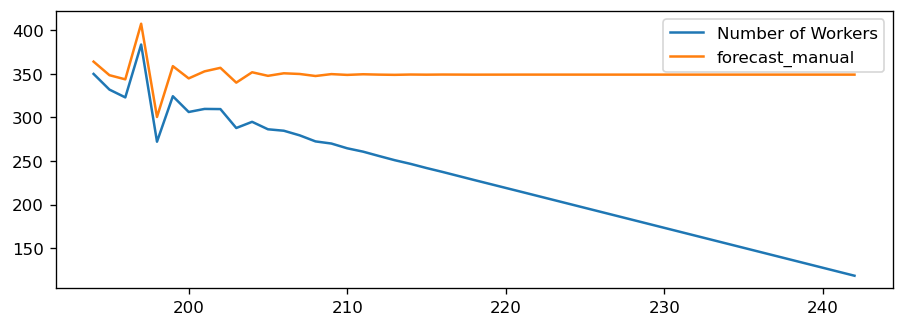

Alaska


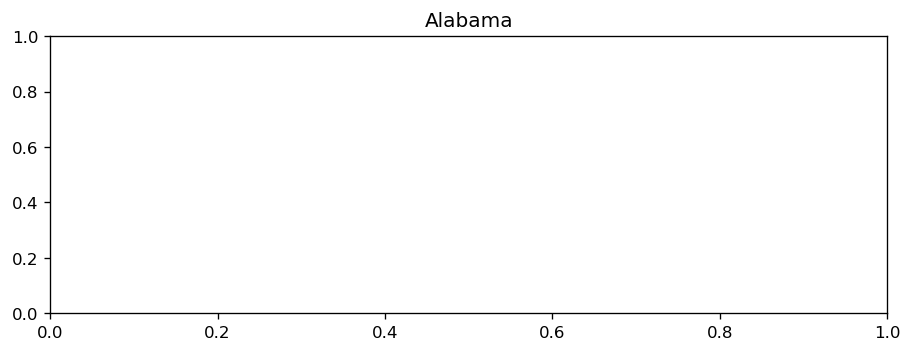

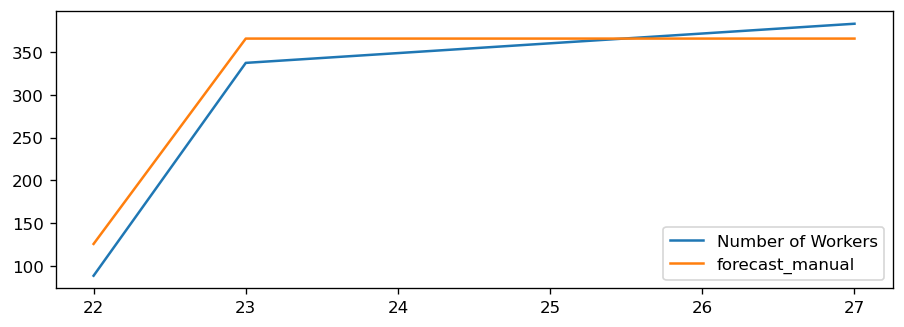

Arizona


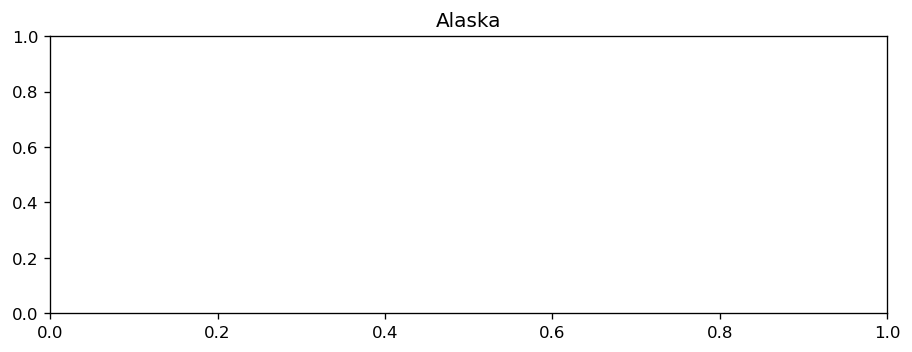

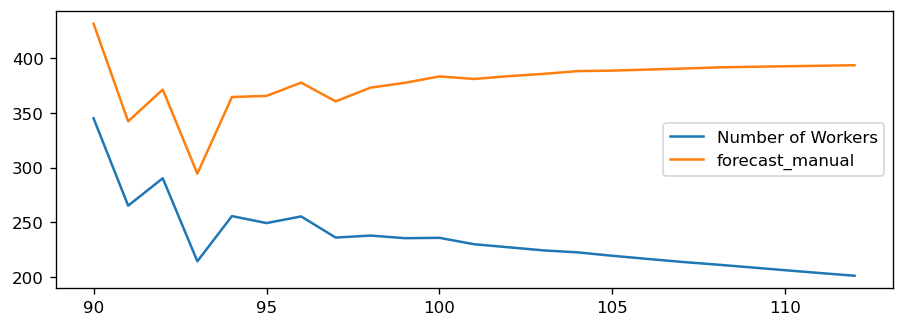

California


Year     Forecast
0  2023  5116.177759
1  2024  5050.617635
2  2025  5288.691315

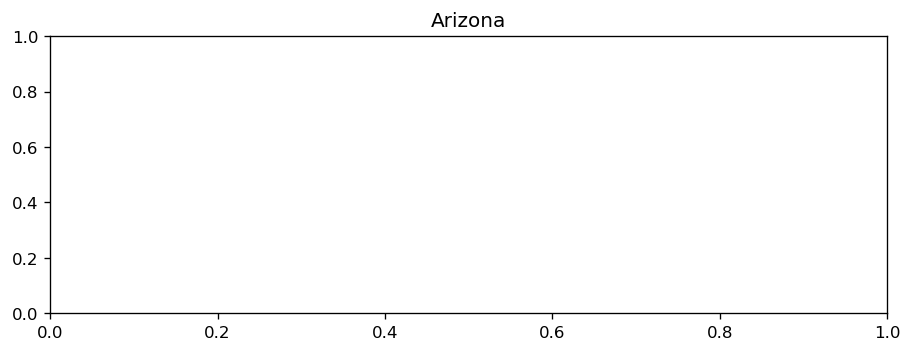

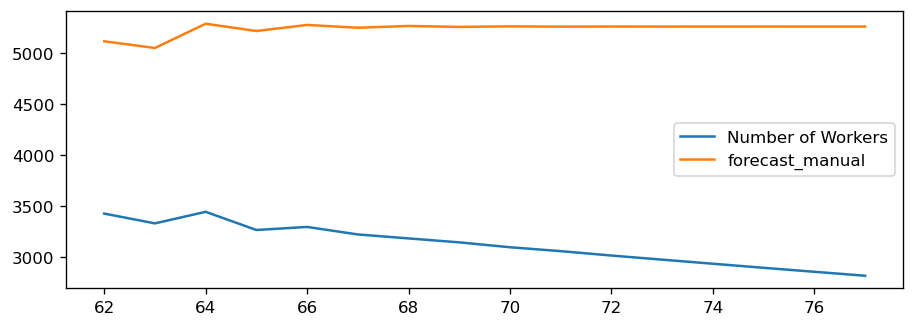

Colorado


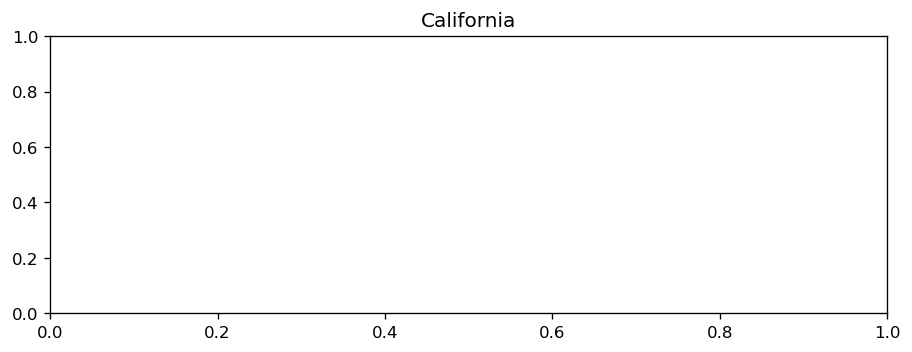

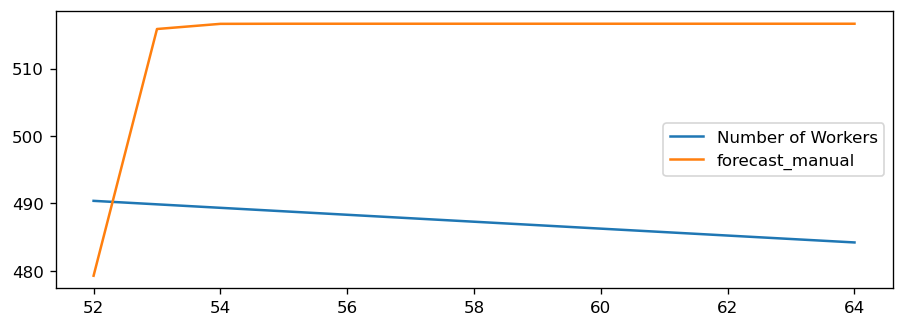

Connecticut


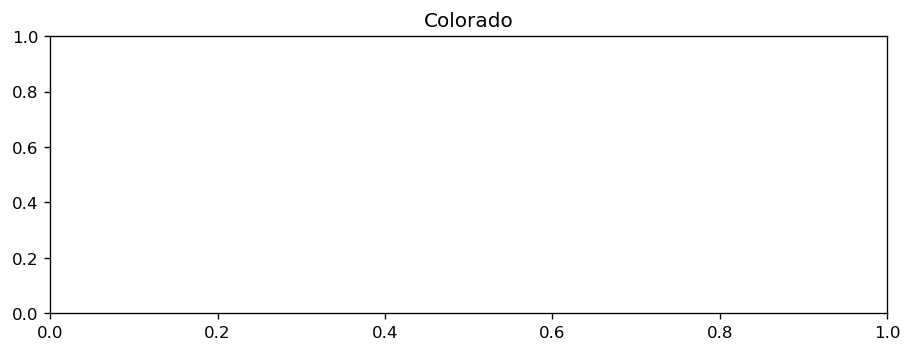

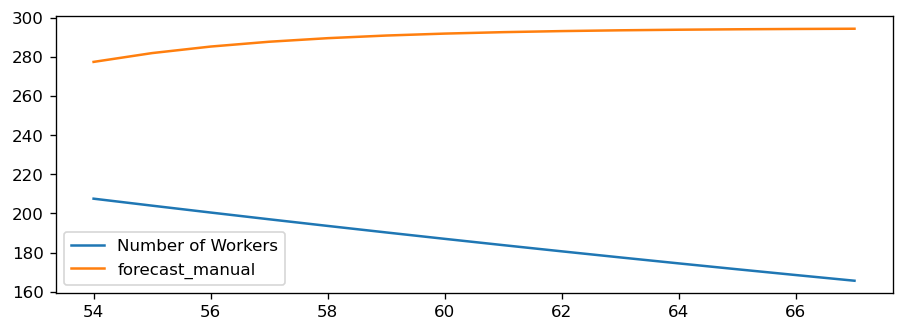

Delaware


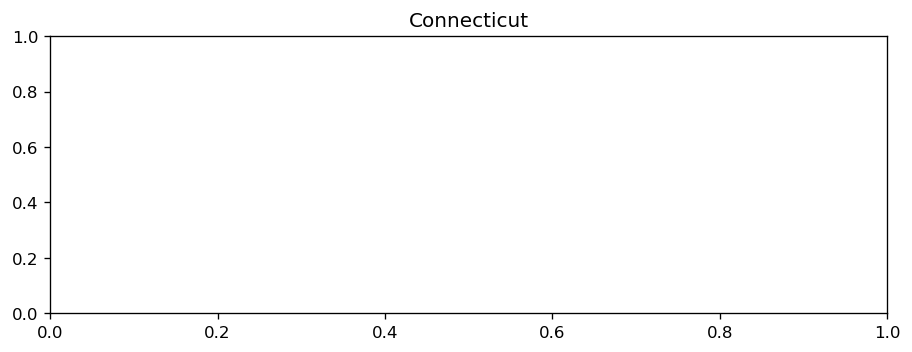

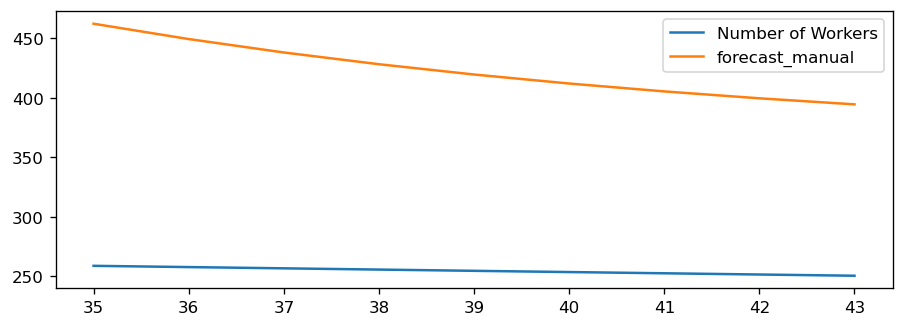

Florida


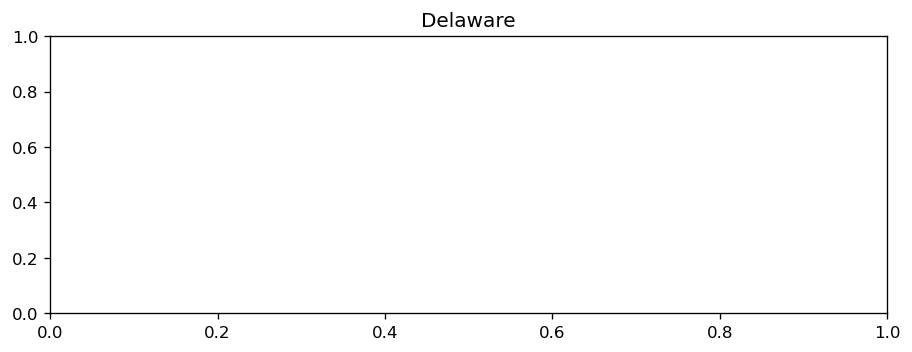

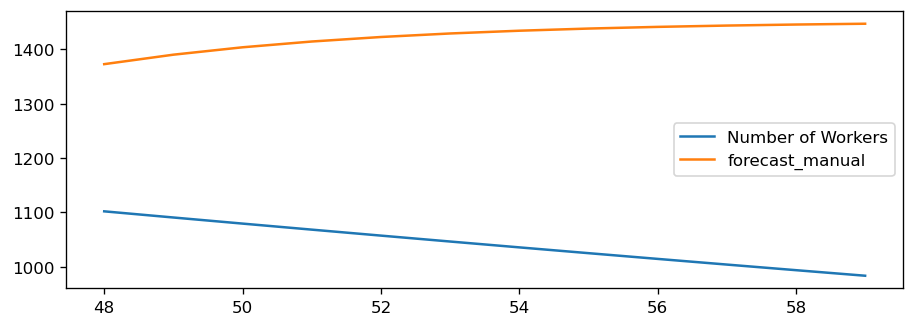

Georgia
Idaho


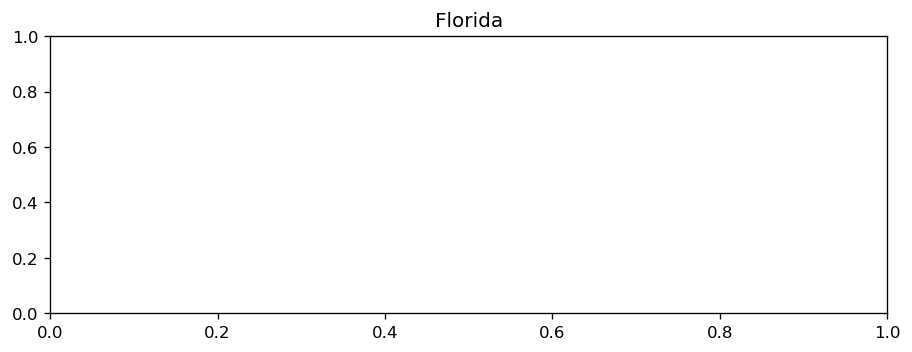

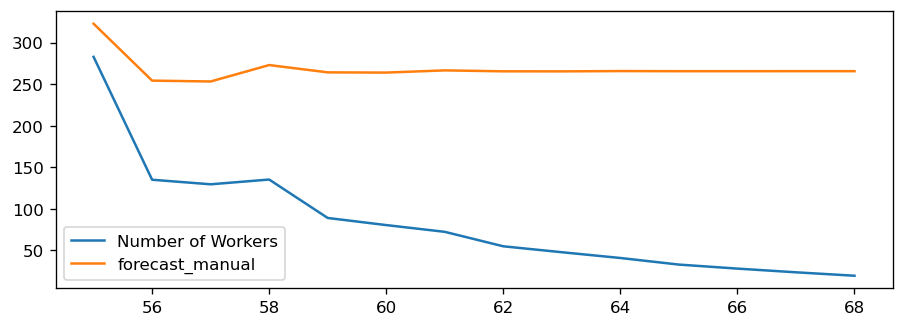

Illinois


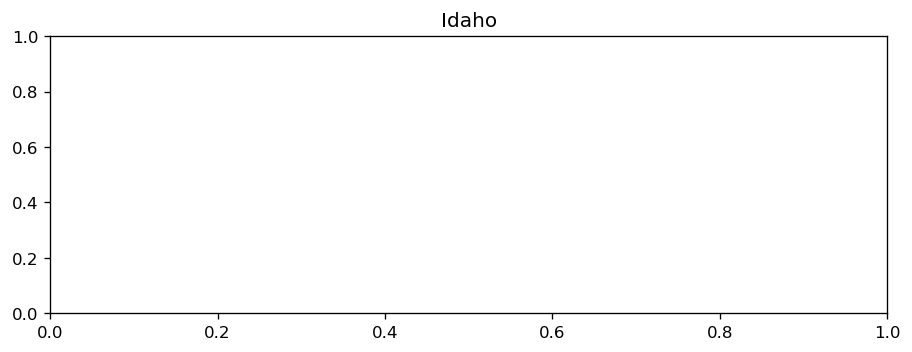

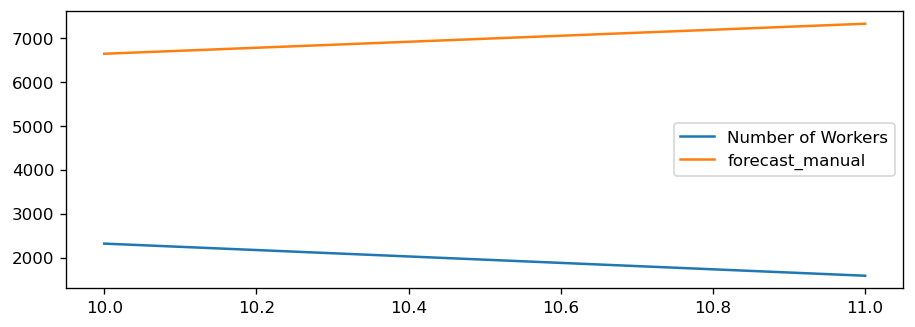

Indiana


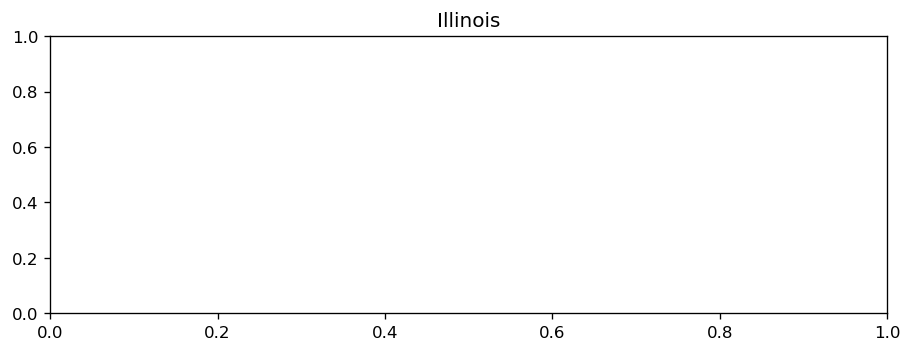

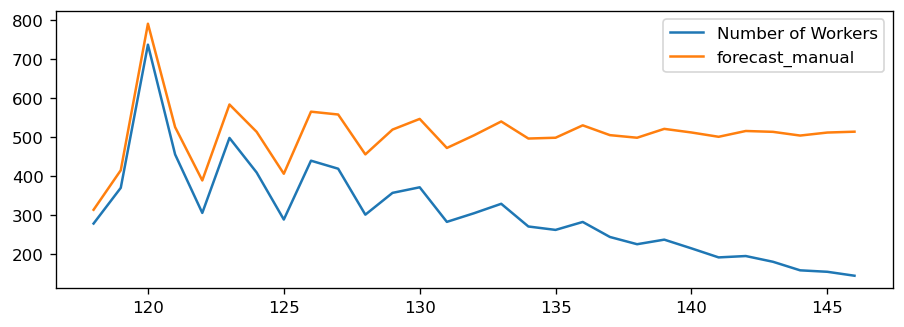

Iowa


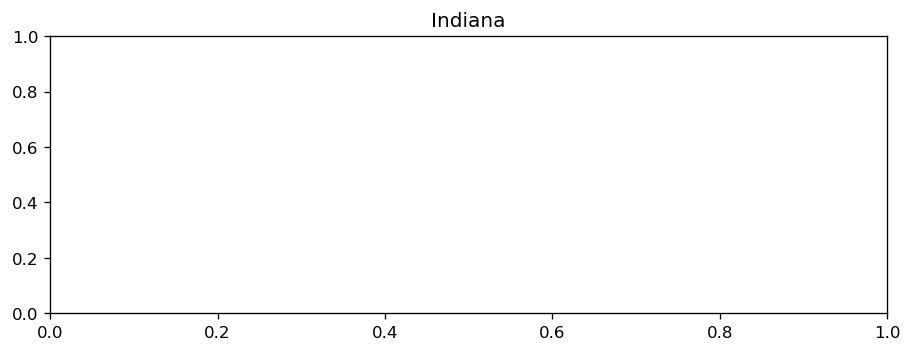

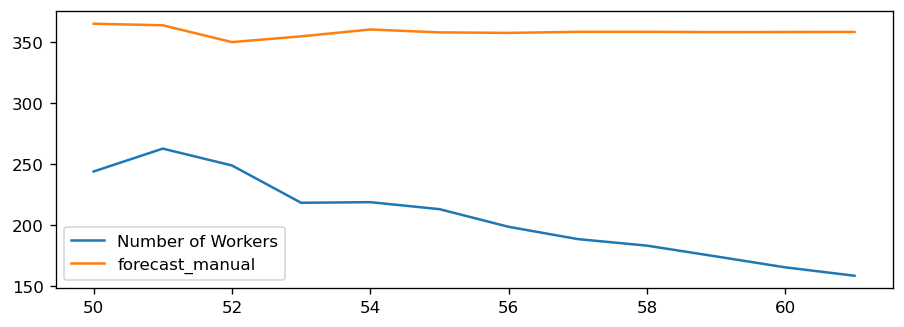

Kansas


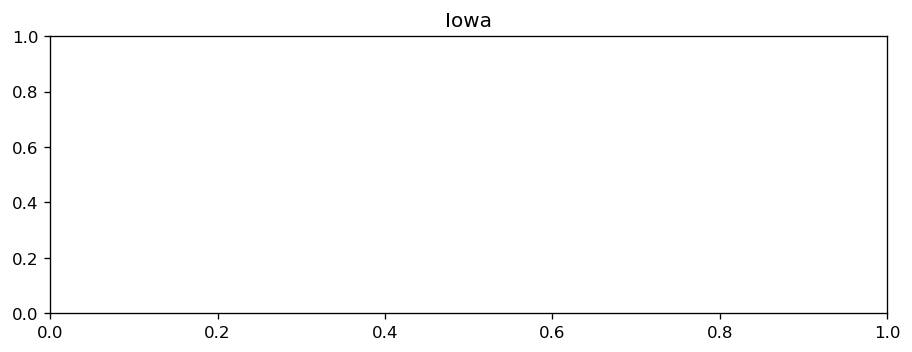

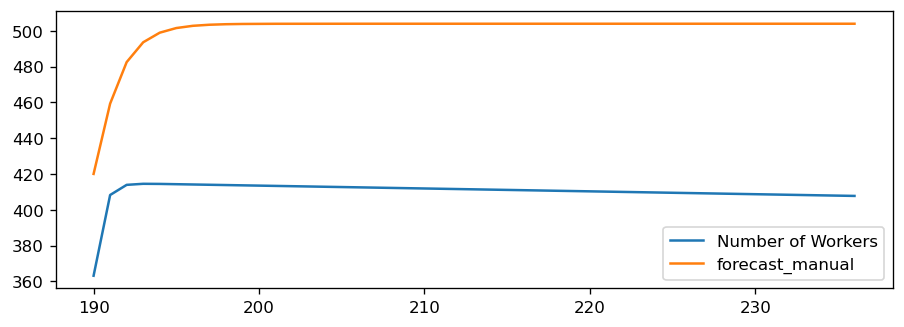

Kentucky


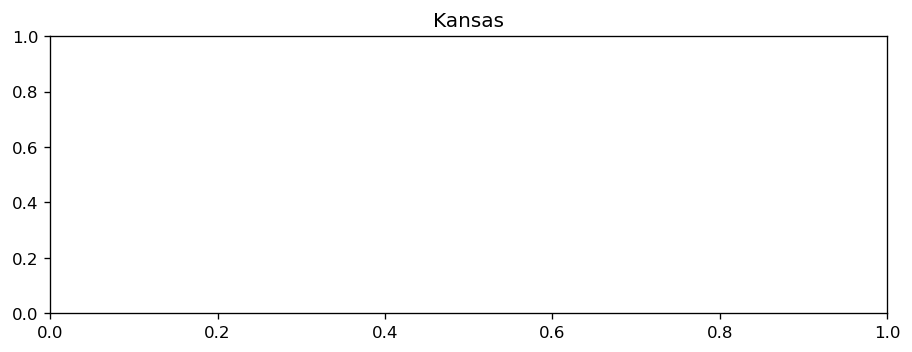

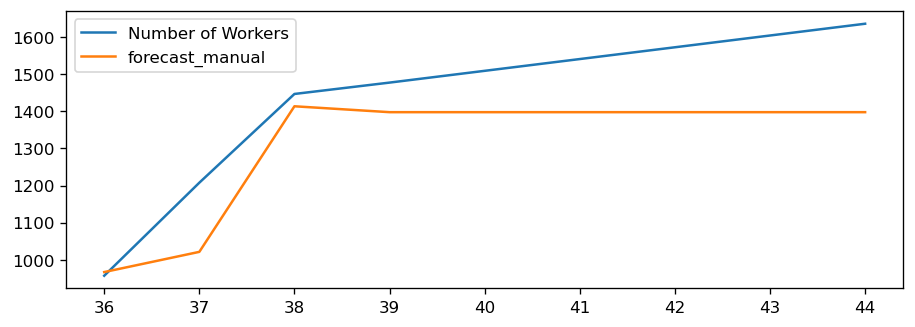

Louisiana


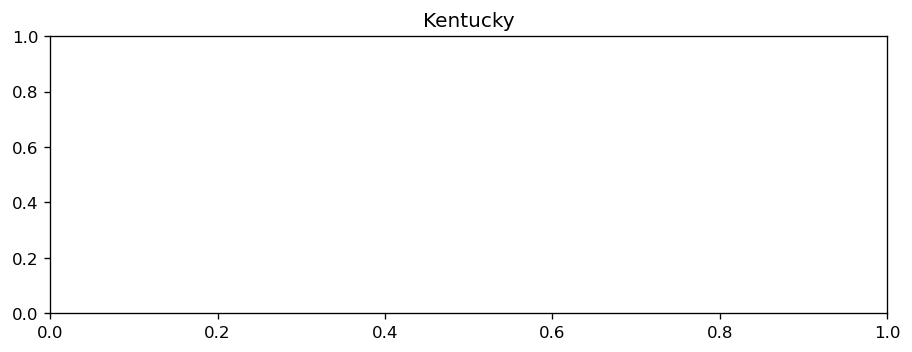

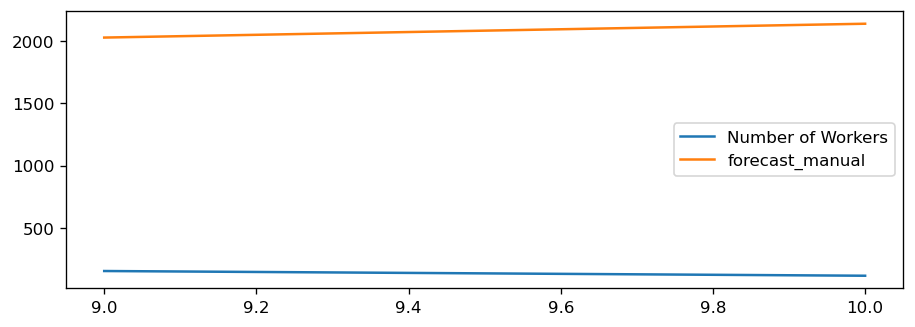

Maine


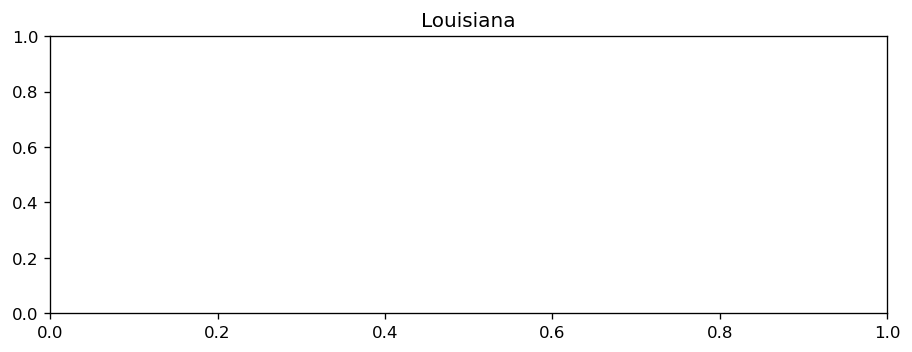

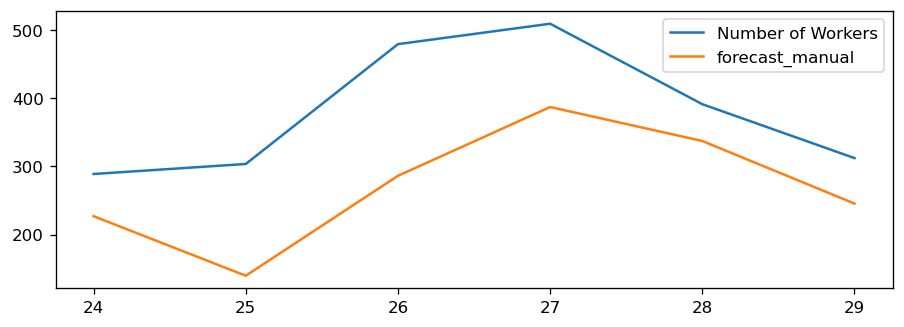

Maryland


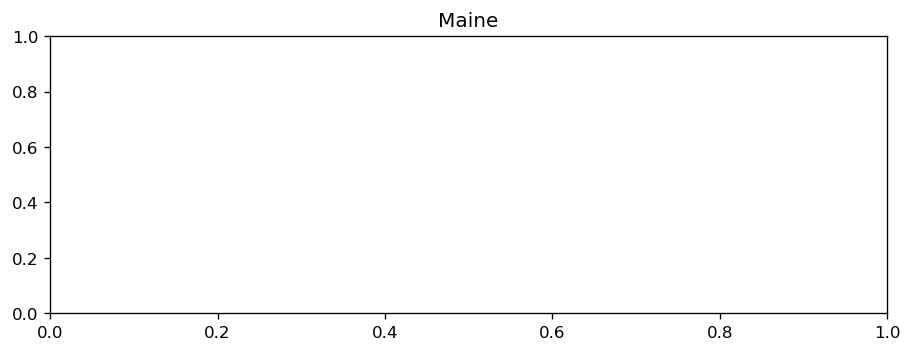

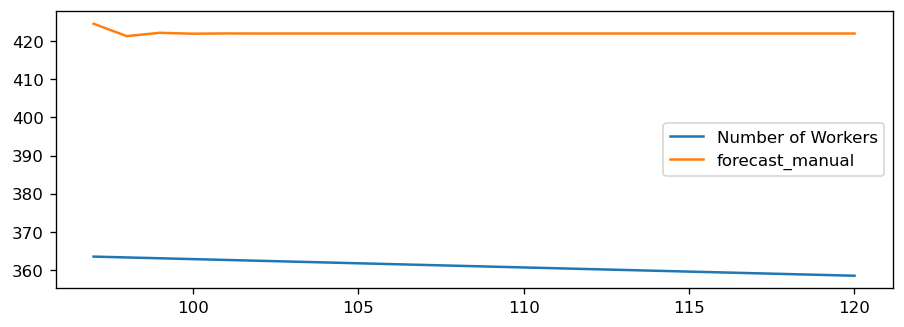

Massachusetts


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,4)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py", li

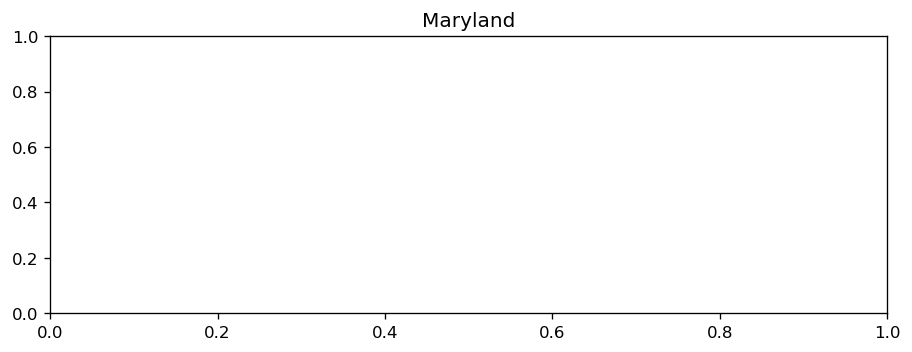

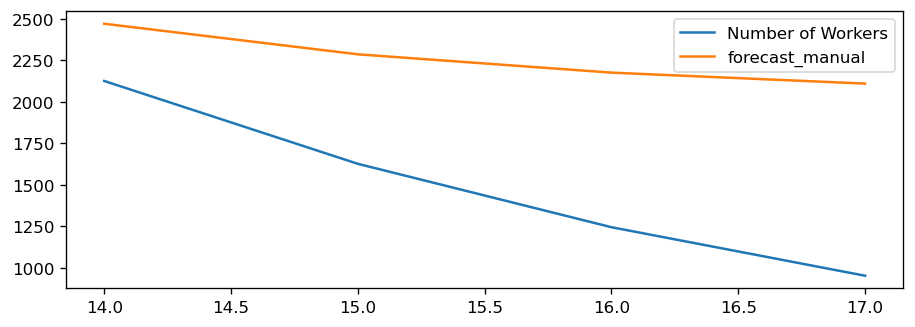

Michigan


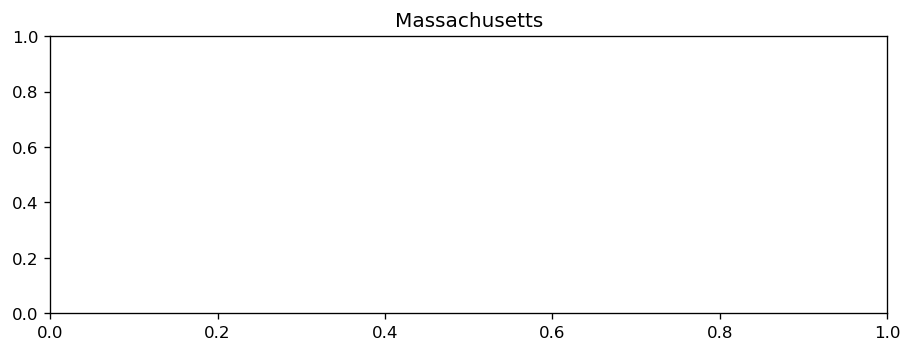

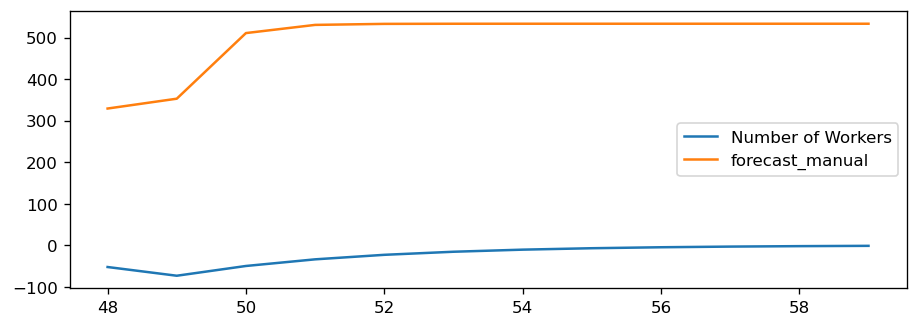

Minnesota


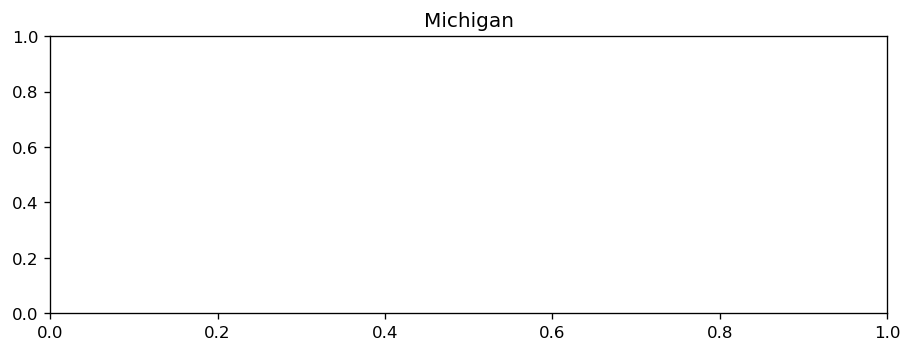

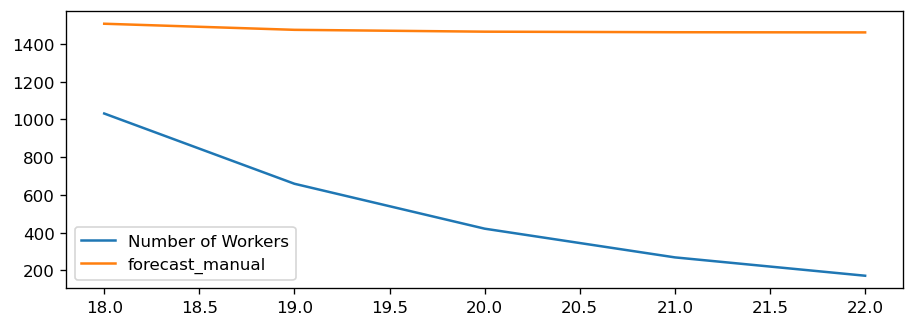

Missouri


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


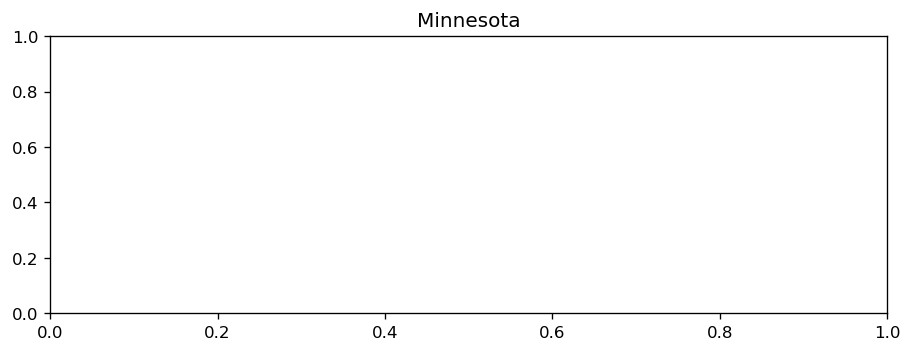

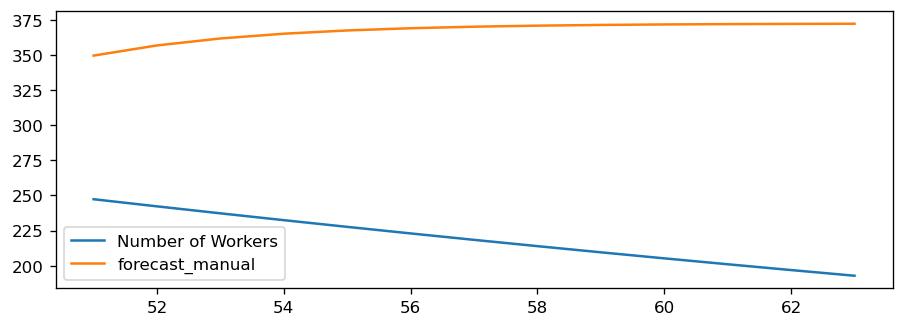

Montana


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,3)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py", li

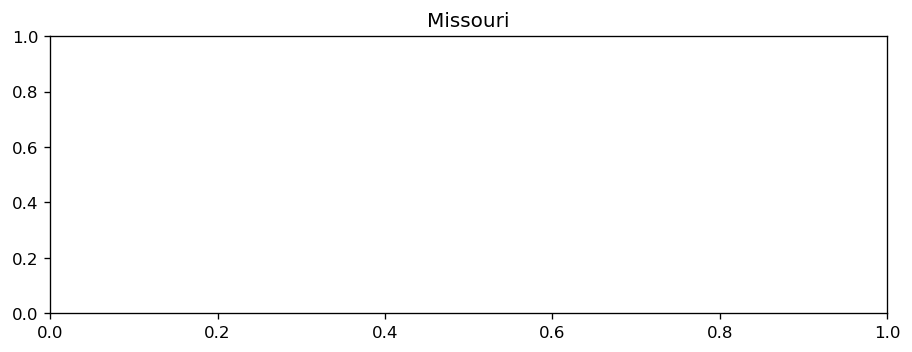

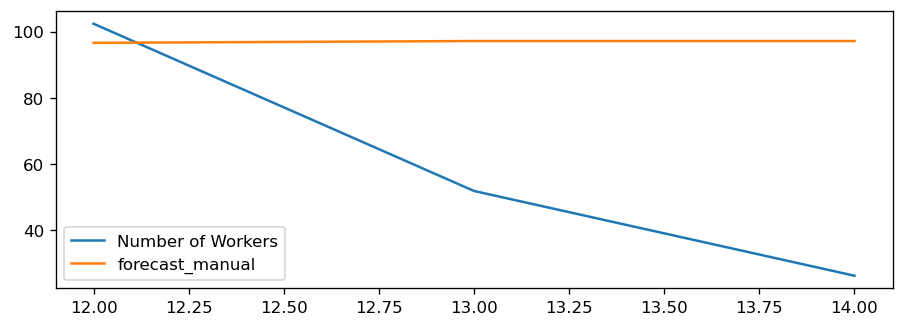

Nebraska


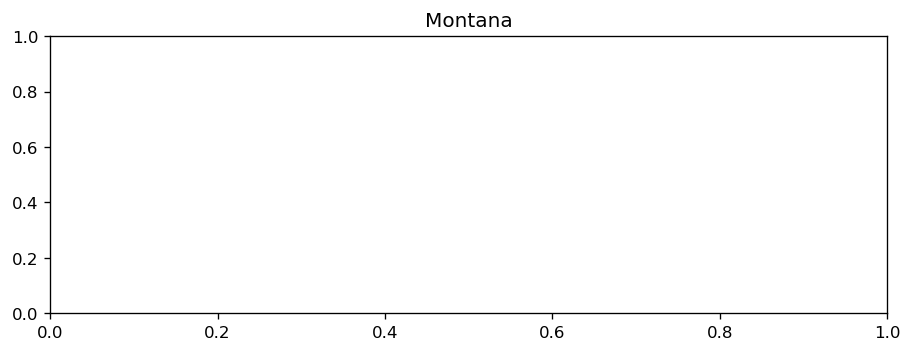

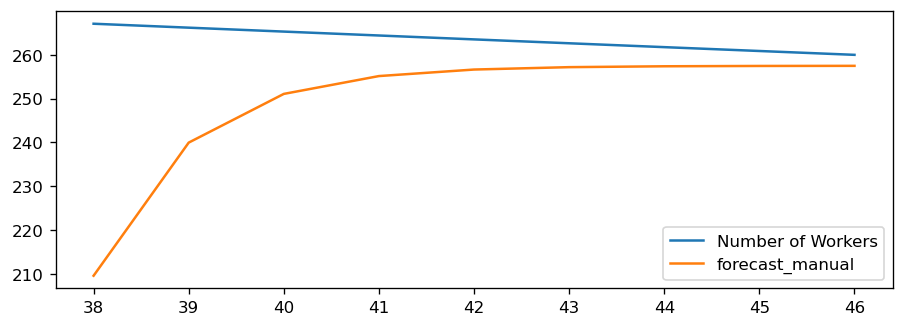

New Mexico


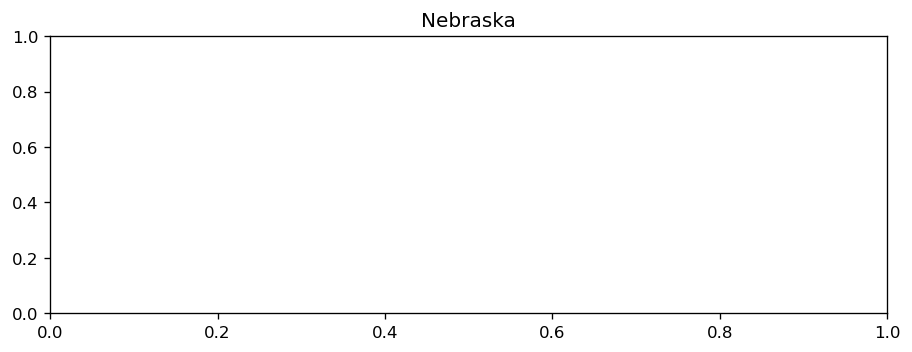

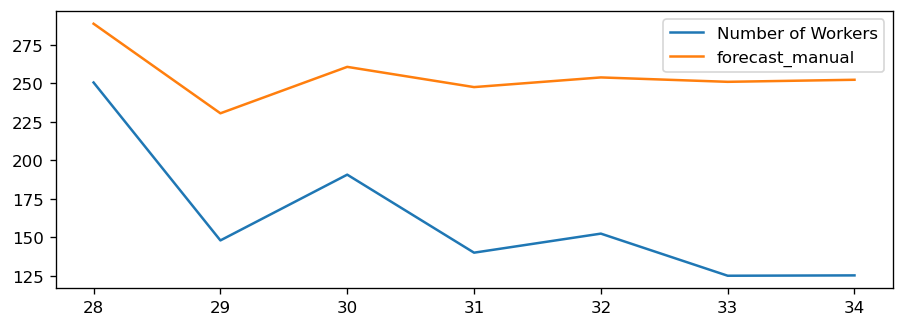

New York


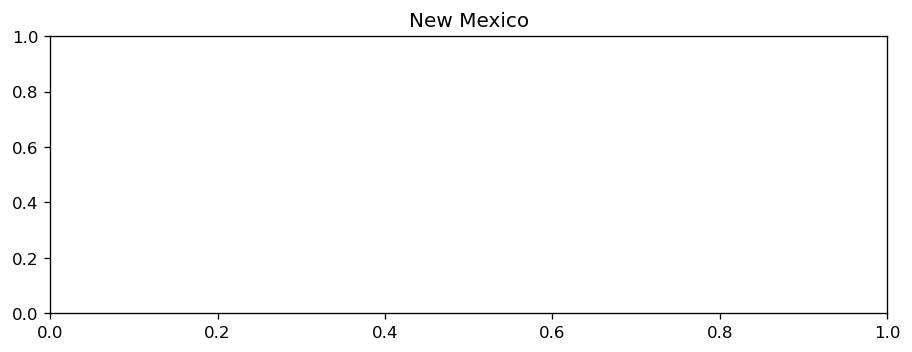

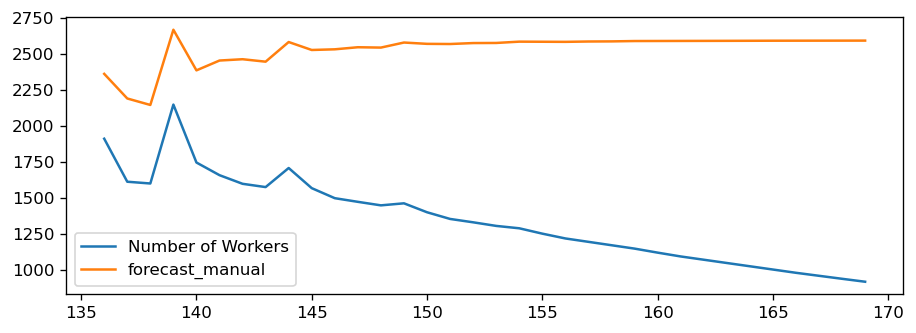

North Carolina


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


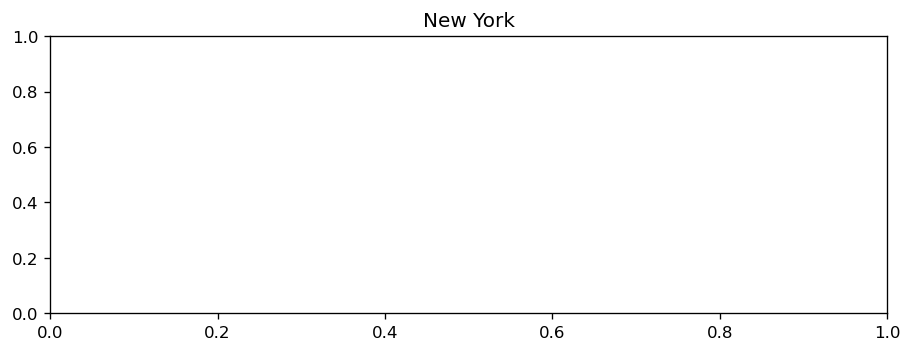

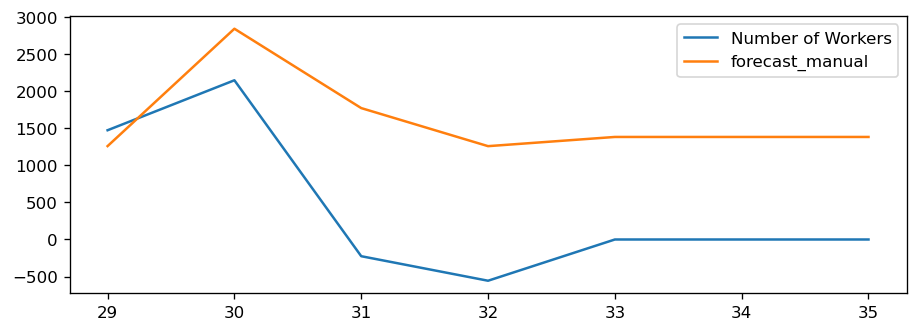

North Dakota


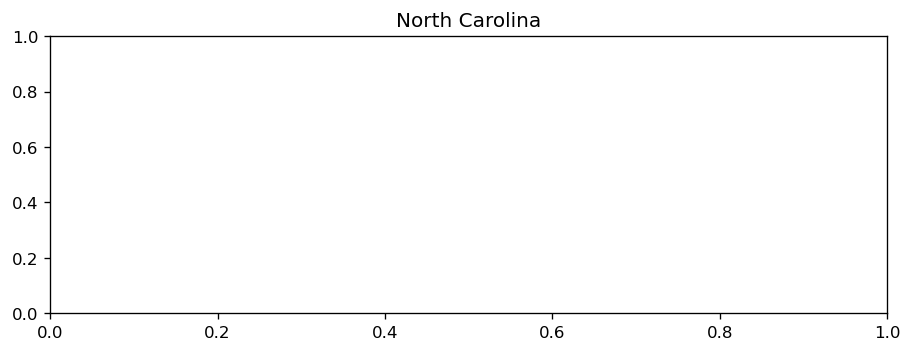

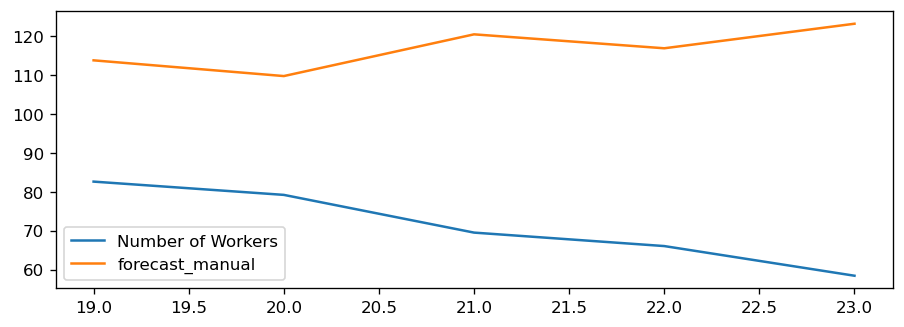

Ohio


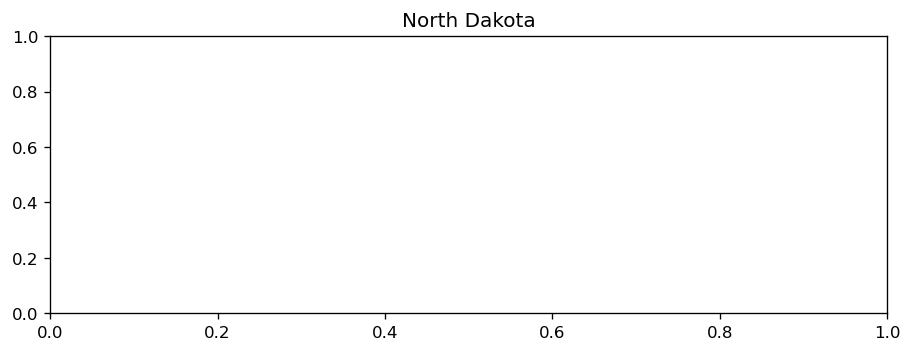

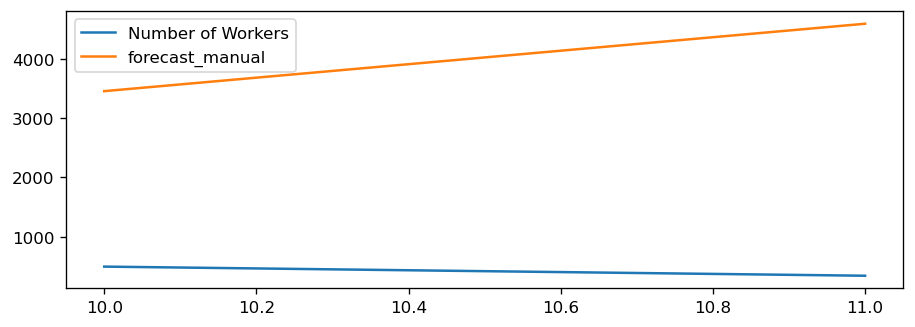

Oklahoma


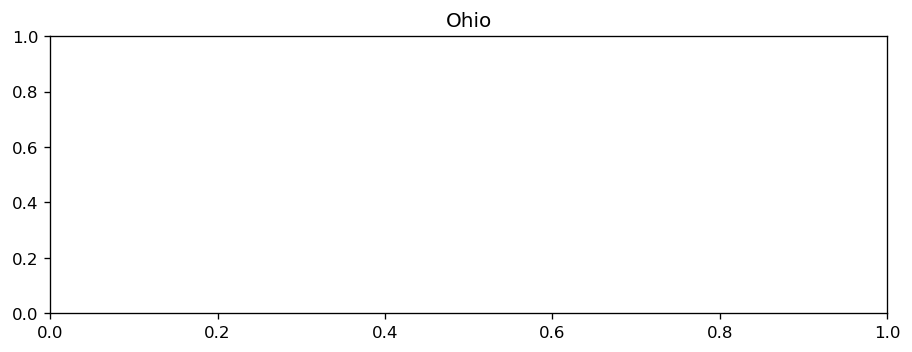

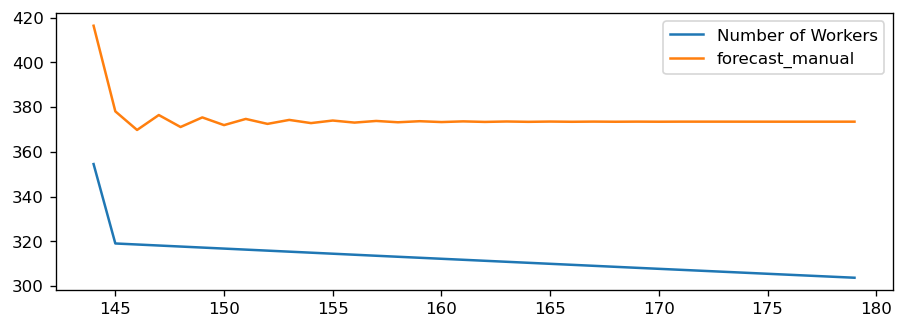

Oregon


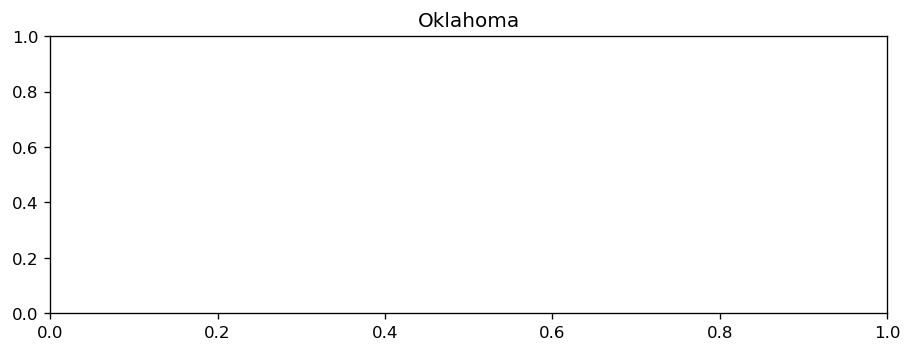

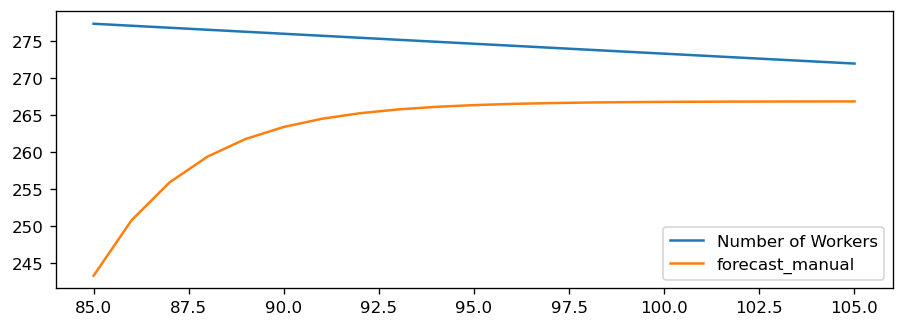

Rhode Island


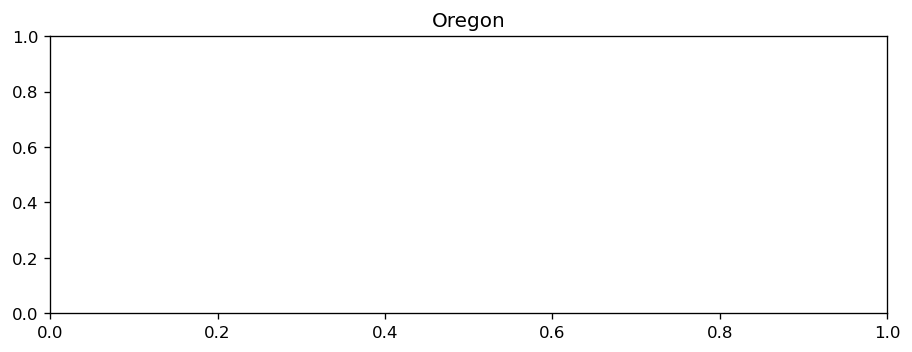

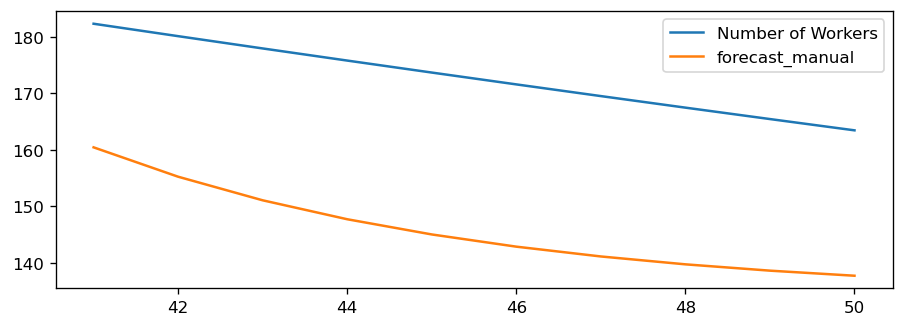

South Carolina


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,0)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py", li

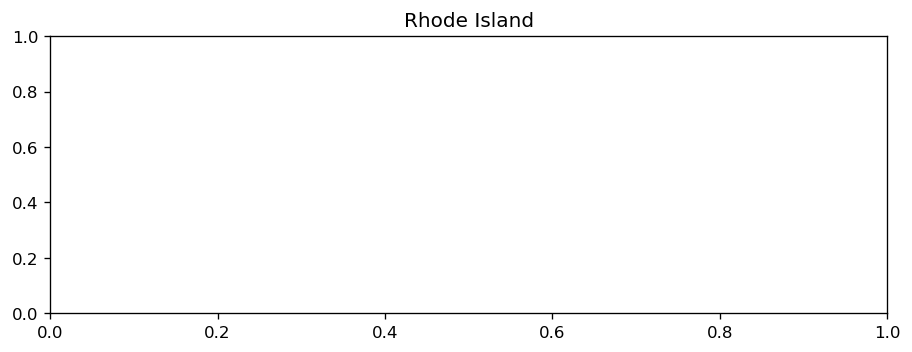

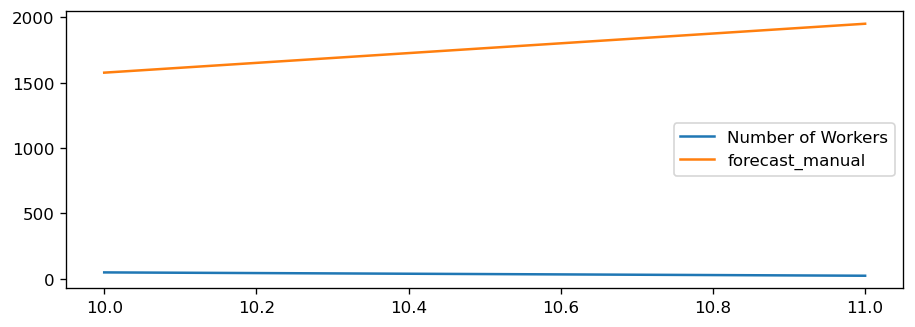

South Dakota


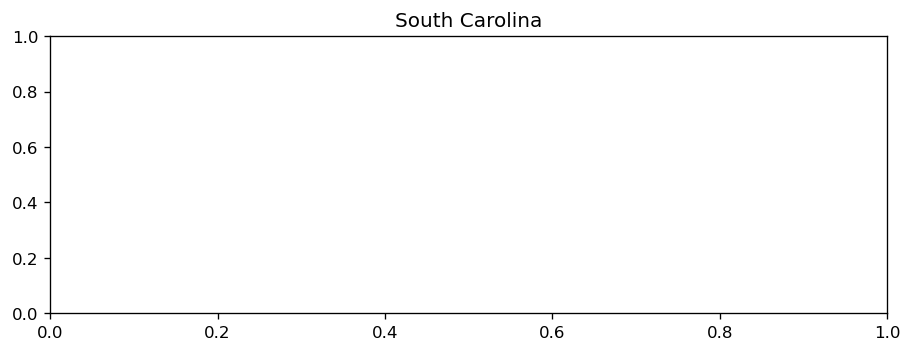

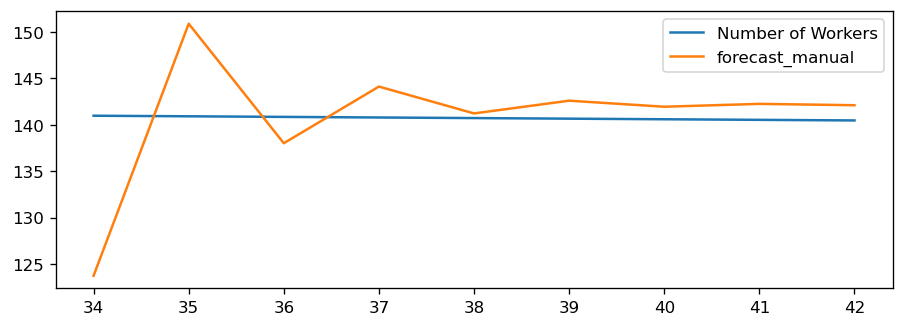

Texas


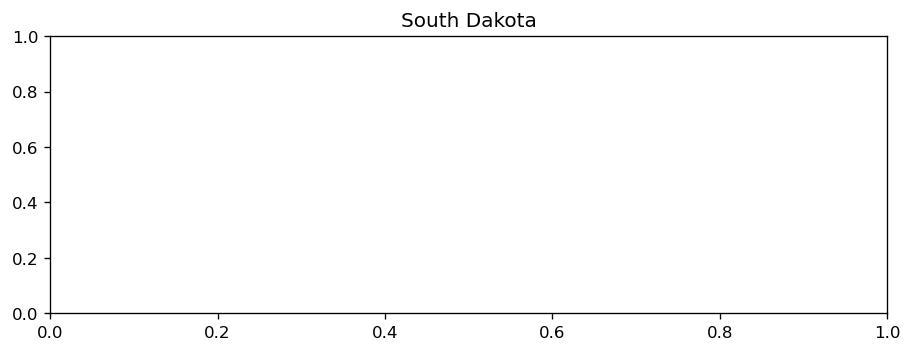

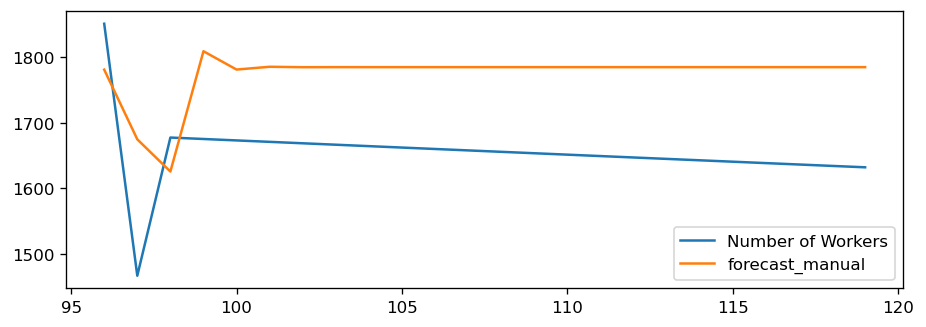

Utah


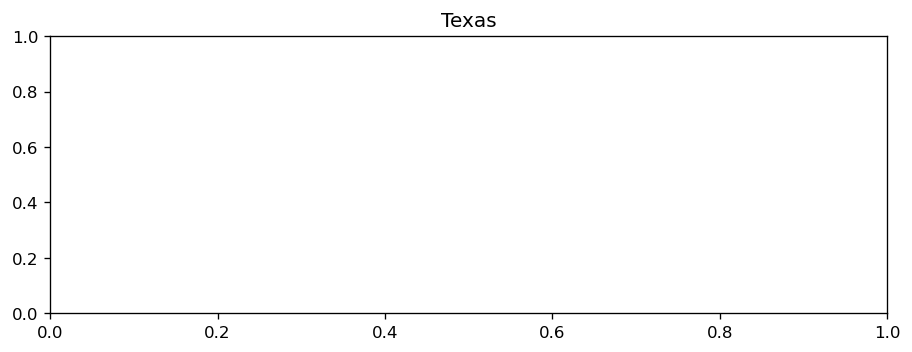

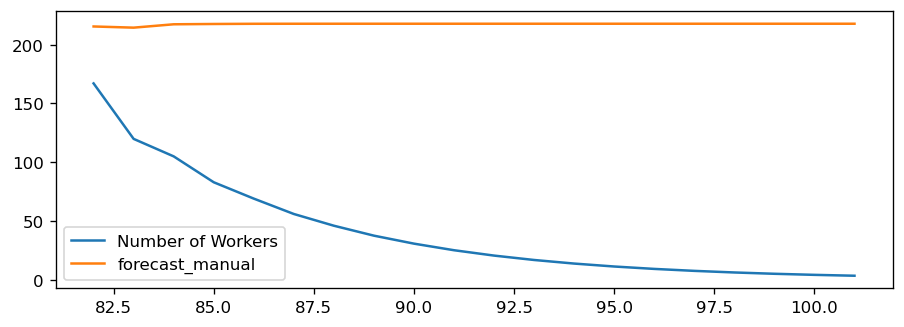

Vermont


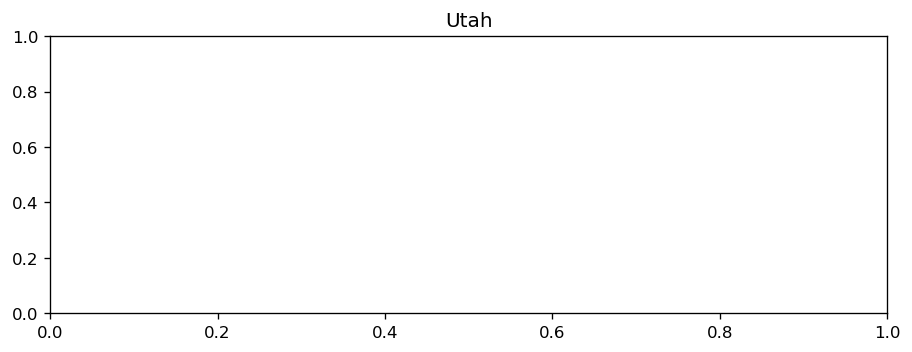

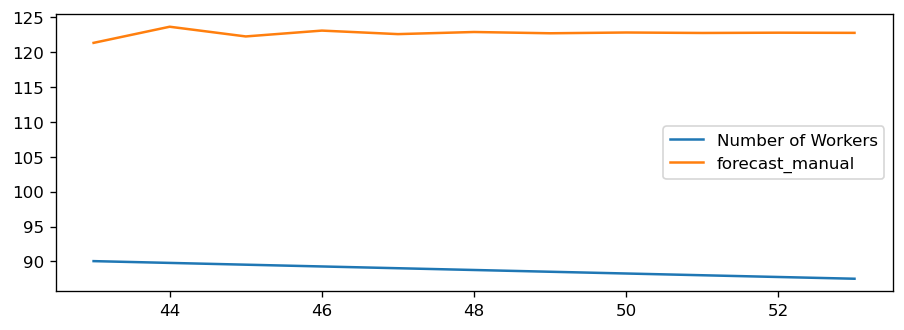

Virginia


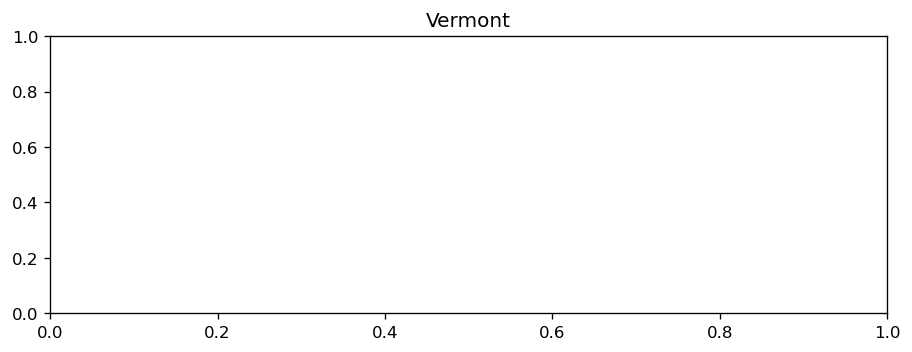

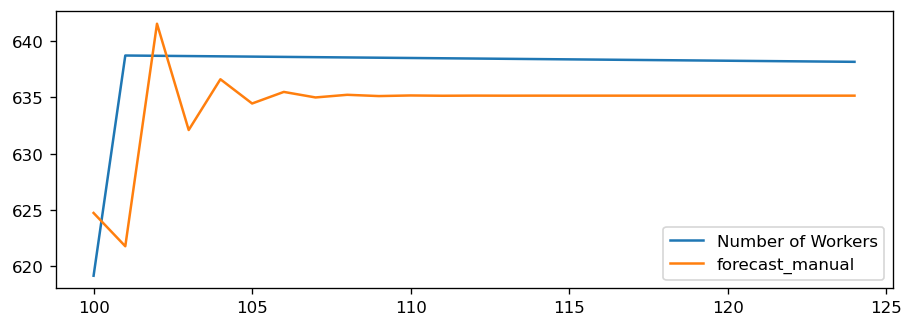

Washington


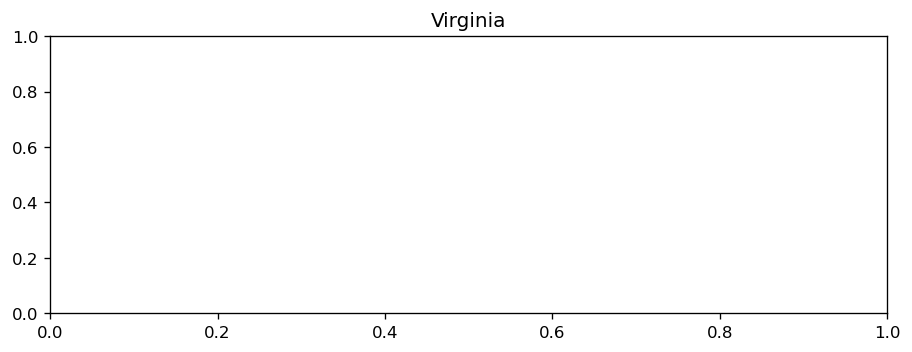

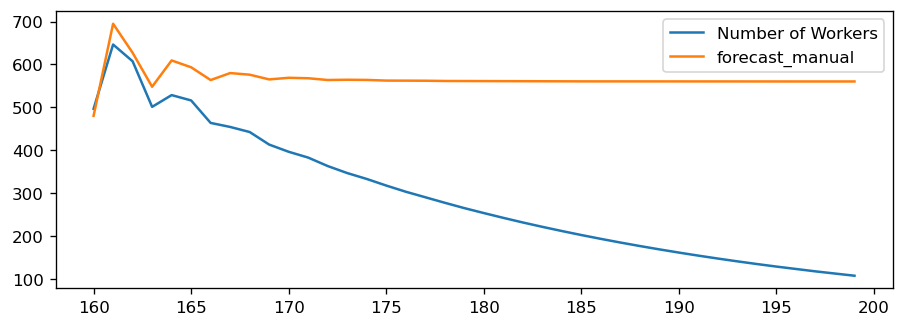

Washington, D.C.


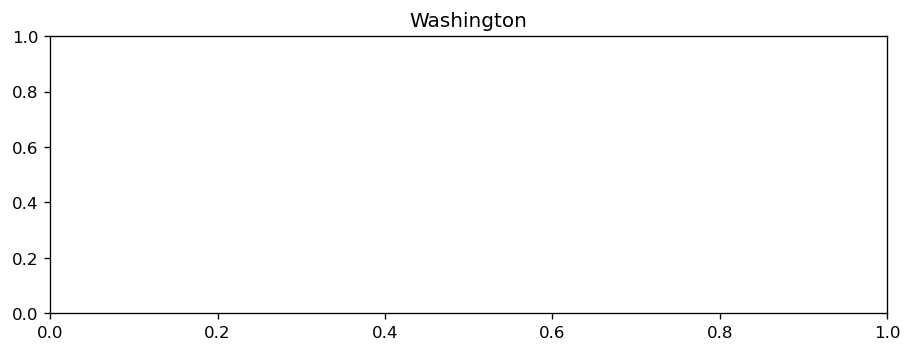

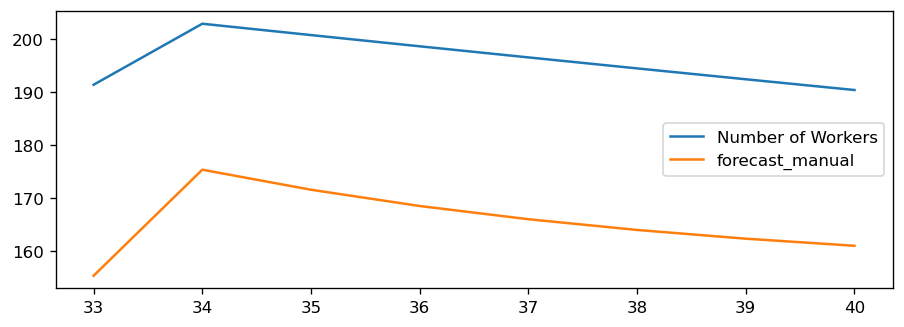

West Virginia


/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/haripriya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


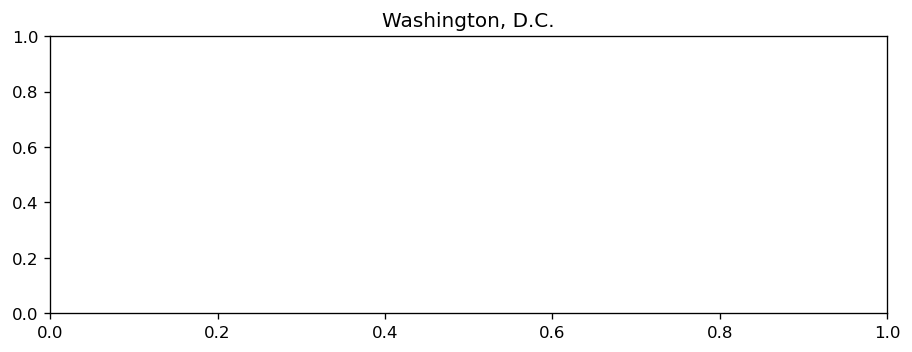

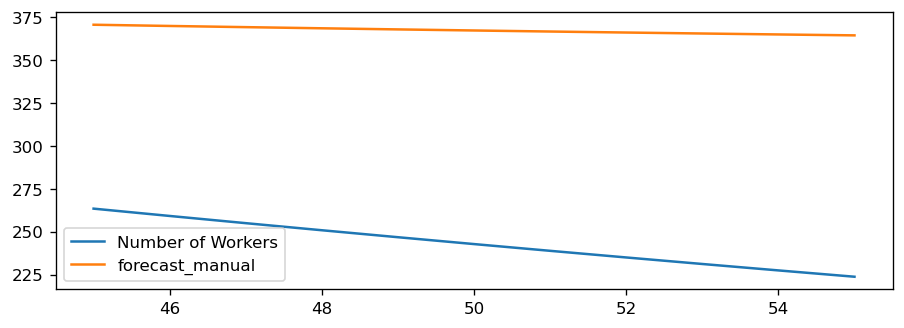

Wisconsin


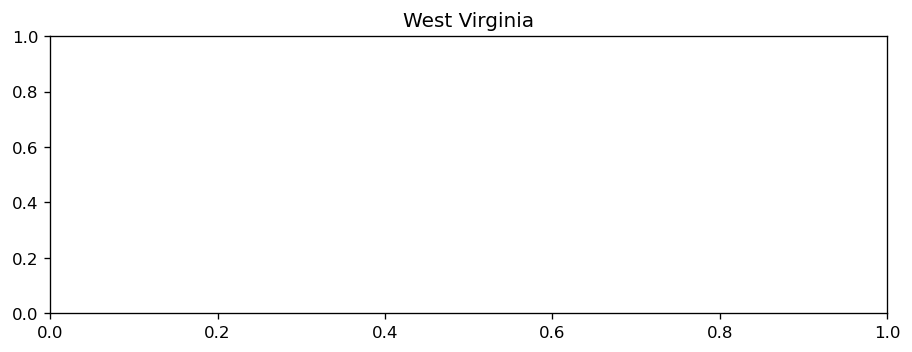

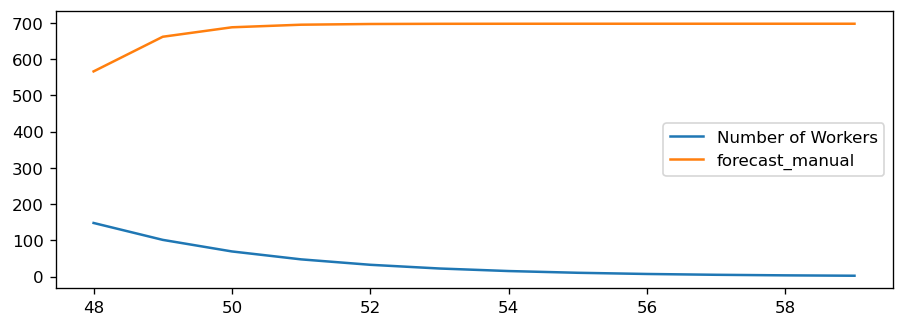

New Jersey


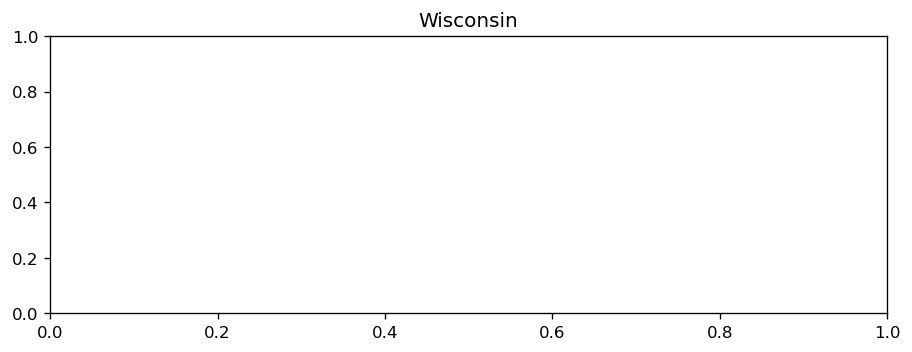

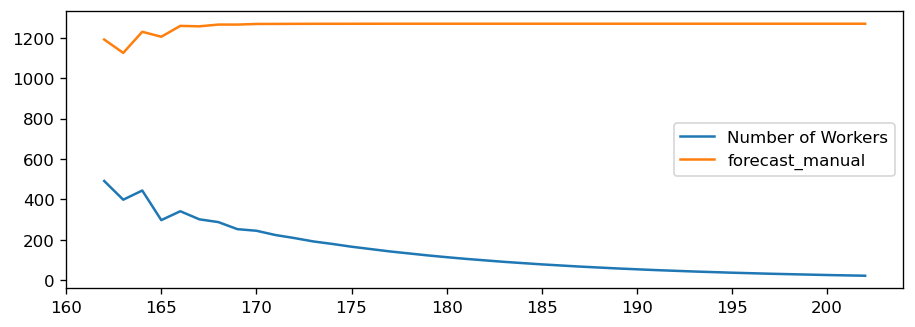

Nevada


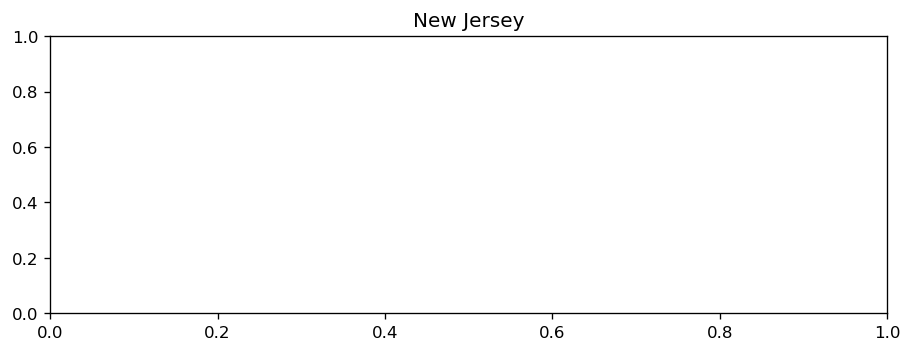

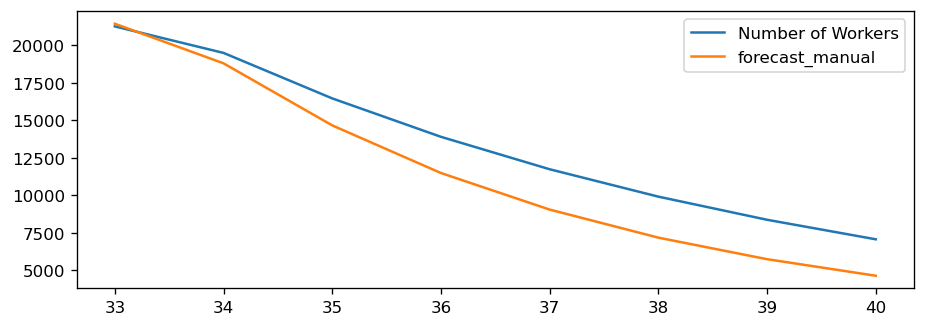

[['Alabama', 4, 1, 0, 206.85780095250541, 1.0845112167244204, 305.86144726610974], ['Alaska', 0, 1, 2, 409.7267784880184, 0.8723638989570376, 495.19175895286736], ['Arizona', 4, 0, 1, 1427.1356317401303, 0.6619623398497088, 2839.1812877916072], ['California', 3, 0, 0, 38437.03284043949, 0.7163322420669245, 71268.1310502231], ['Colorado', 1, 0, 1, 1834.5975603561226, 0.9863434386947971, 2658.0834428715225], ['Connecticut', 1, 0, 1, 718.8086851905211, 6.559843525484161e+16, 1093.9711889163173], ['Delaware', 1, 0, 1, 373.72993487312345, 0.7902853136384996, 716.6492833633688], ['Florida', 1, 0, 1, 14092.260410827586, 0.7733803844063556, 18076.276293684765], ['Georgia', 0, 0, 0, 0, 0, 0], ['Idaho', 3, 0, 0, 156.65799430973695, 1.3227475689242143, 363.92527065686846], ['Illinois', 1, 0, 0, 760.1699901132811, 0.6254693273463359, 788.4341549042117], ['Indiana', 5, 1, 0, 944.1027029367608, 0.8340720508934053, 2007.495641340514], ['Iowa', 4, 0, 0, 267.39178377386736, 0.6430081569235533, 369.3507

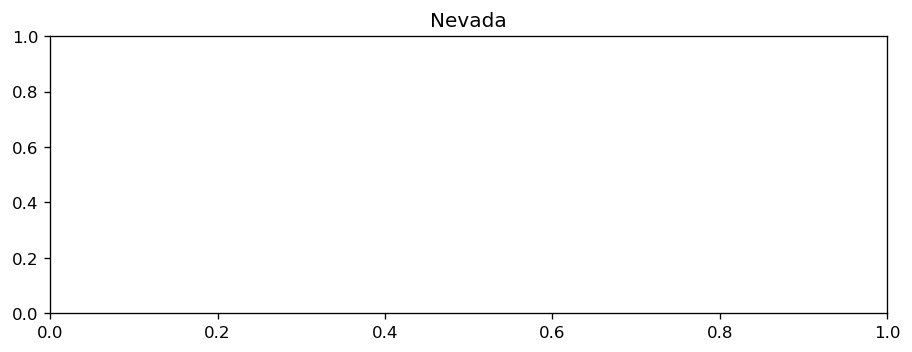

In [125]:
#Plot for all the states
table = []
for i in range(copy_df['State'].nunique()):
    p,d,q,mae,mape,rmse= allstates(copy_df,copy_df['State'].unique()[i])
    table.append([copy_df['State'].unique()[i],p,d,q,mae,mape,rmse])
print(table)


In [126]:
#State, p, d, q, mae, mape, rmse
table = pd.DataFrame(table,columns=['State','p','d','q','mae','mape','rmse'])
print(table)

               State  p  d  q           mae          mape          rmse
0            Alabama  4  1  0    206.857801  1.084511e+00    305.861447
1             Alaska  0  1  2    409.726778  8.723639e-01    495.191759
2            Arizona  4  0  1   1427.135632  6.619623e-01   2839.181288
3         California  3  0  0  38437.032840  7.163322e-01  71268.131050
4           Colorado  1  0  1   1834.597560  9.863434e-01   2658.083443
5        Connecticut  1  0  1    718.808685  6.559844e+16   1093.971189
6           Delaware  1  0  1    373.729935  7.902853e-01    716.649283
7            Florida  1  0  1  14092.260411  7.733804e-01  18076.276294
8            Georgia  0  0  0      0.000000  0.000000e+00      0.000000
9              Idaho  3  0  0    156.657994  1.322748e+00    363.925271
10          Illinois  1  0  0    760.169990  6.254693e-01    788.434155
11           Indiana  5  1  0    944.102703  8.340721e-01   2007.495641
12              Iowa  4  0  0    267.391784  6.430082e-01    369

In [127]:
copy_df['State'].nunique()

44